## 1. Package Installation

In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [ ]:
# !pip install vaderSentiment

In [217]:
# df_wine.to_csv('wine_clean.csv')

## 2. Read Data

In [3]:
# df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = pd.read_csv('data/wine_clean.csv')
df_copy = df_wine.copy()
df_wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,title,...,130,131,132,133,134,135,136,137,138,139
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,39.5,Sicily & Sardinia,Etna,None,Nicosia 2013 Vulkà Bianco (Etna),...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),...,0.0,0.0,0.0,0.081144,0.000000,0.000000,0.0,0.0,0.0,0.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,St. Julian 2013 Reserve Late Harvest Riesling ...,...,0.0,0.0,0.0,0.349908,0.092807,0.000000,0.0,0.0,0.0,0.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,0.0,0.0,0.0,0.000000,0.000000,0.048212,0.0,0.0,0.0,0.0


In [4]:
df_wine = df_wine.iloc[:,1:]
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,...,130,131,132,133,134,135,136,137,138,139
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,39.5,Sicily & Sardinia,Etna,None,Nicosia 2013 Vulkà Bianco (Etna),White Blend,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,...,0.0,0.0,0.0,0.081144,0.000000,0.000000,0.0,0.0,0.0,0.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,...,0.0,0.0,0.0,0.349908,0.092807,0.000000,0.0,0.0,0.0,0.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,...,0.0,0.0,0.0,0.000000,0.000000,0.048212,0.0,0.0,0.0,0.0


In [ ]:
# drop duplicated rows
df_wine = df_wine.drop_duplicates()

In [7]:
df_wine.shape

(119928, 160)

## 3. EDA

### 3.1 Brief Information

In [219]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119928 entries, 0 to 119927
Columns: 160 entries, country to 139
dtypes: float64(146), int64(1), object(13)
memory usage: 151.3+ MB


In [220]:
df_wine.describe()

,points,price,positive,neutral,negative,compound,normalized rating,0,1,2,...,130,131,132,133,134,135,136,137,138,139
count,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,...,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000,119928.000000
mean,88.442149,35.806259,0.127594,0.858435,0.013970,0.259912,4.798967,0.001550,0.009320,0.000977,...,0.008621,0.021275,0.002650,0.014597,0.013406,0.001024,0.001970,0.000860,0.001147,0.002399
std,3.093287,40.751448,0.093915,0.093810,0.031214,0.222284,1.391979,0.009066,0.045647,0.007452,...,0.041302,0.098026,0.013379,0.056466,0.057192,0.007505,0.010918,0.007054,0.007502,0.011983
min,80.000000,4.000000,0.000000,0.295500,0.000000,-0.829000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,18.000000,0.056500,0.798000,0.000000,0.106067,3.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88.000000,27.000000,0.116333,0.868000,0.000000,0.252633,4.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,91.000000,44.000000,0.188000,0.928667,0.000000,0.406908,5.950000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,3300.000000,0.704500,1.000000,0.679500,0.976600,10.000000,0.283244,0.877918,0.388457,...,0.800430,0.958630,0.494226,0.900709,0.899767,0.296945,0.334432,0.336572,0.232397,0.293572


### 3.2 Distribution & Correlation

#### 3.2.1 Geology

In [221]:
print(df_wine['country'].unique())
len(df_wine['country'].unique())

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' 'Turkey' 'Czech Republic' 'Slovenia'
 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon' 'Serbia'
 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus' 'Armenia'
 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia' 'Macedonia'
 'China' 'Egypt']


43

In [222]:
df_wine.groupby(['country']).points.agg([len, min, max, np.mean]).sort_values(by = ['len'], ascending=False)

,len,min,max,mean
country,,,,
US,50457,80,100,88.555384
France,20353,80,100,88.866752
Italy,17940,80,100,88.576198
Spain,6116,80,98,87.235612
Portugal,5256,80,100,88.263128
Chile,4183,80,95,86.460196
Argentina,3544,80,97,86.649831
Austria,3034,82,98,90.129532
Australia,2197,80,100,88.561220


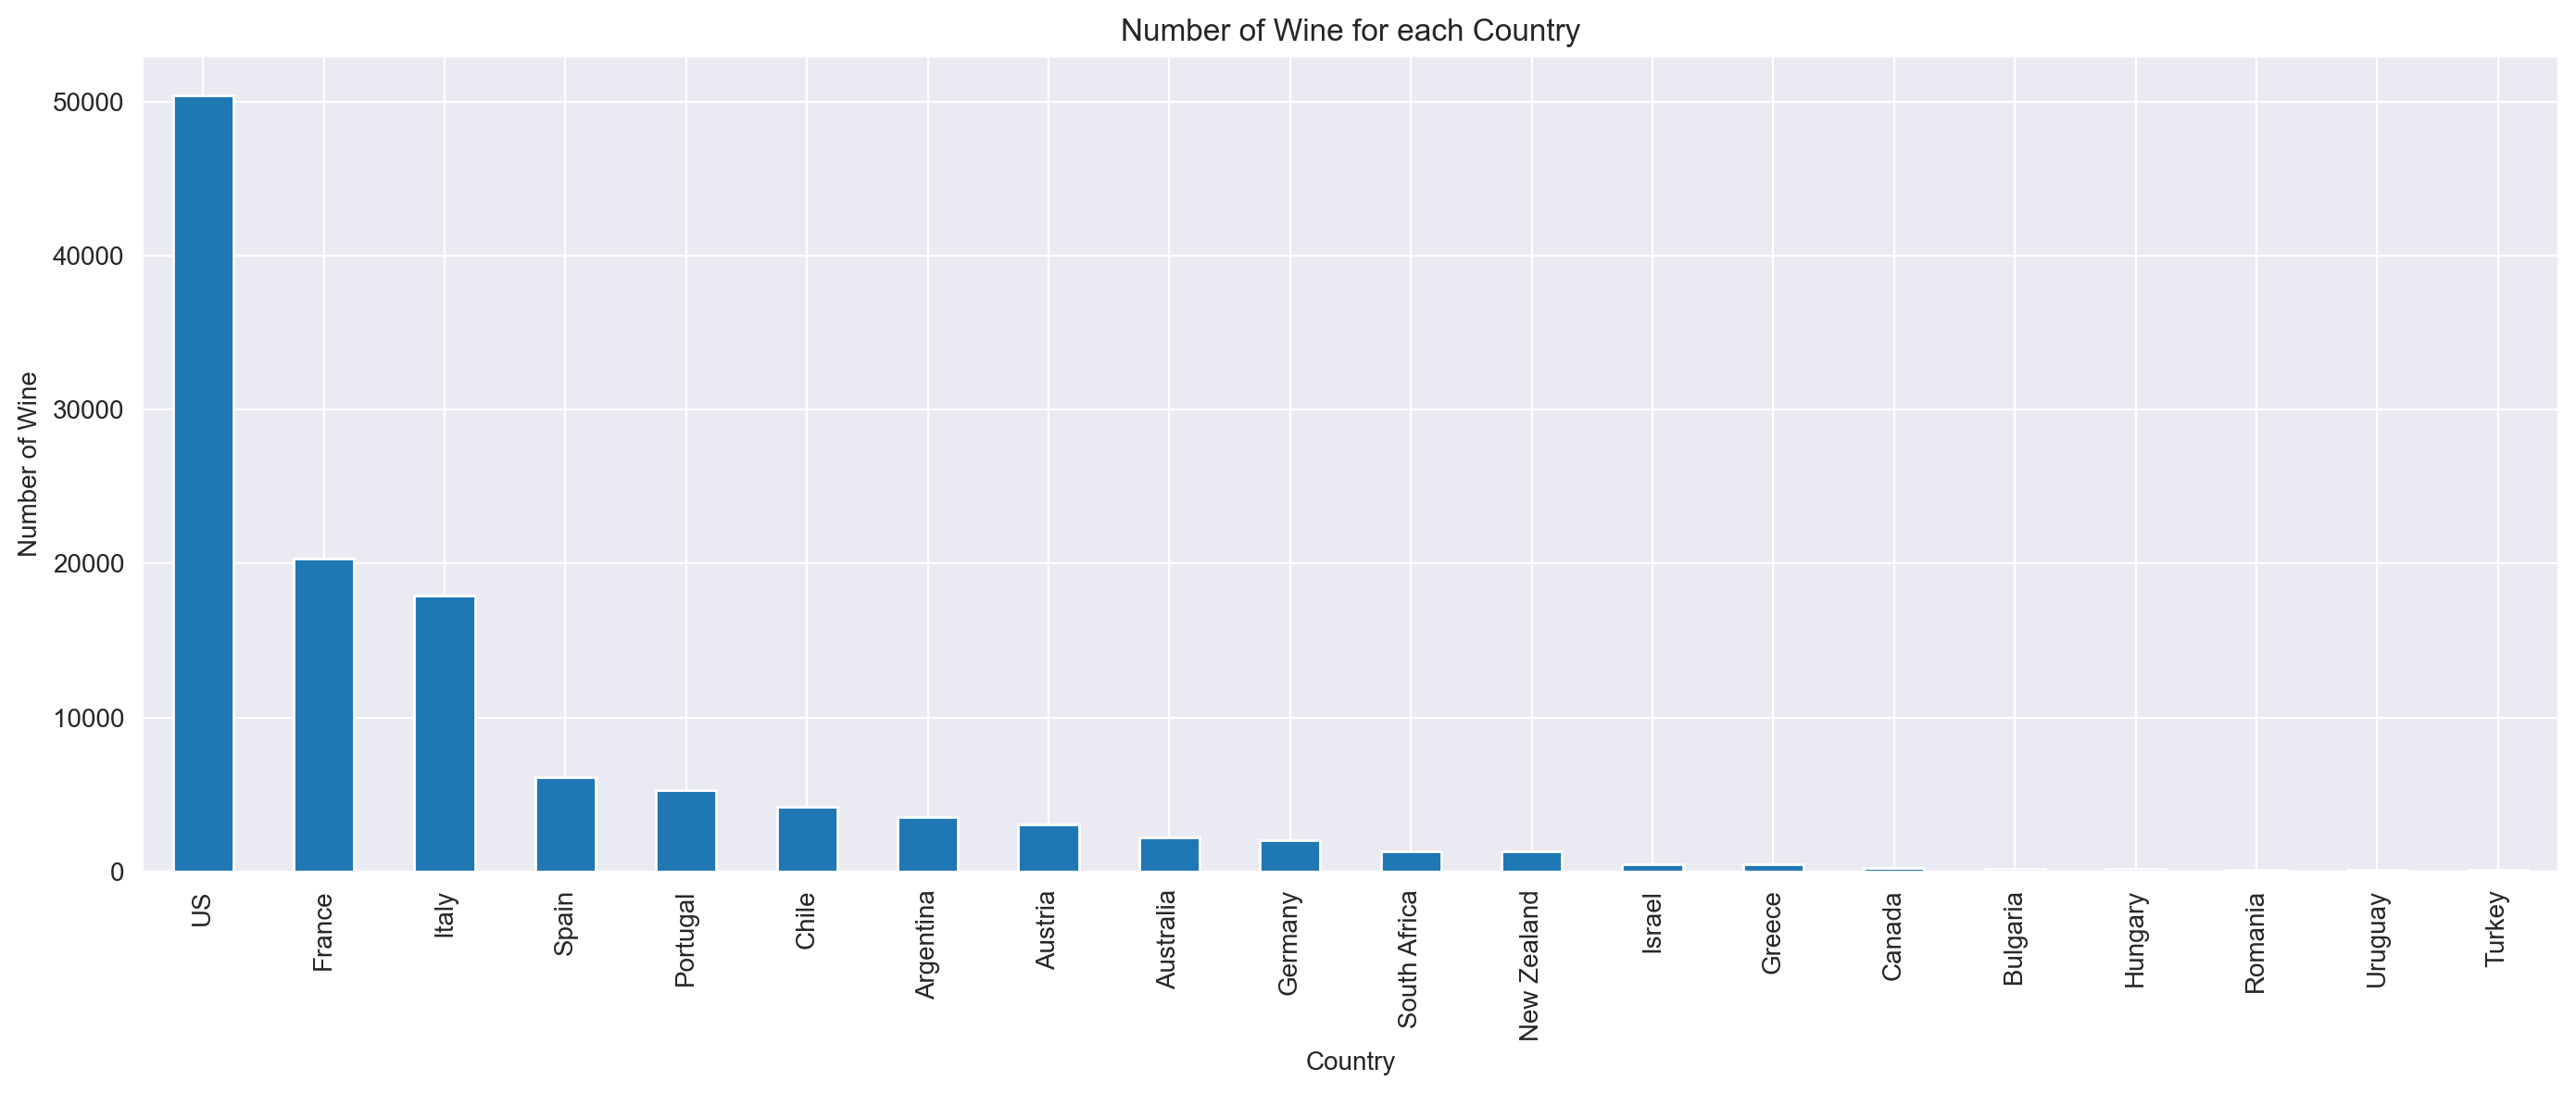

In [223]:
fig, ax = plt.subplots(figsize=(14, 6))
df_wine.groupby(['country'])['points'].agg(len).sort_values(ascending=False)[0:20].plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Number of Wine')
ax.set_title('Number of Wine for each Country')

fig.tight_layout()

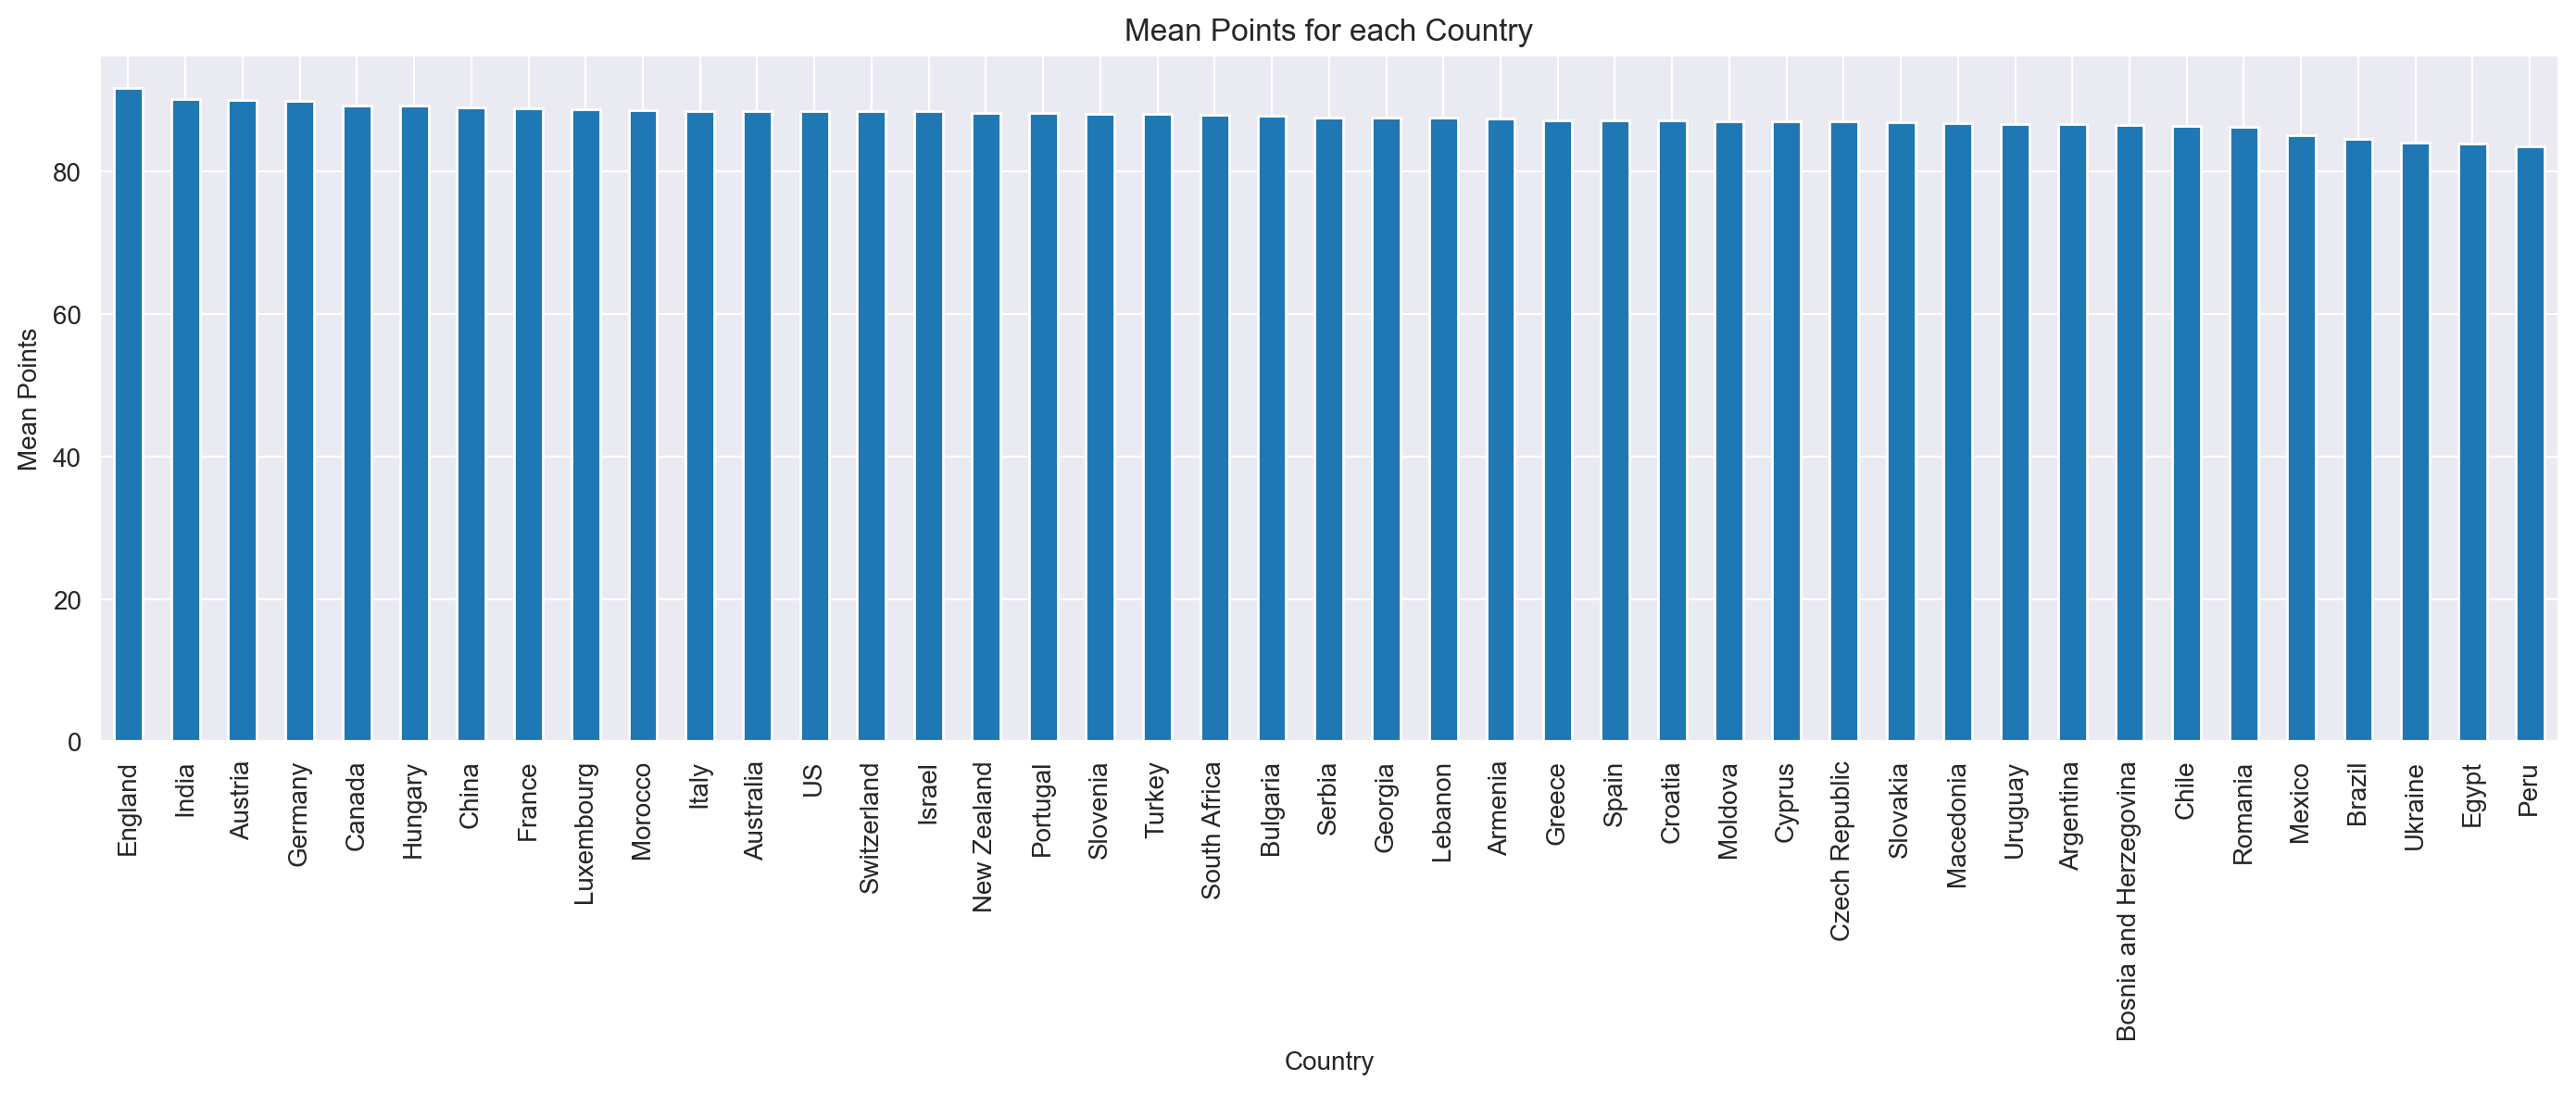

In [224]:
fig, ax = plt.subplots(figsize=(14, 6))
df_wine.groupby(['country'])['points'].agg(np.mean).sort_values(ascending=False).plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Mean Points')
ax.set_title('Mean Points for each Country')

fig.tight_layout()

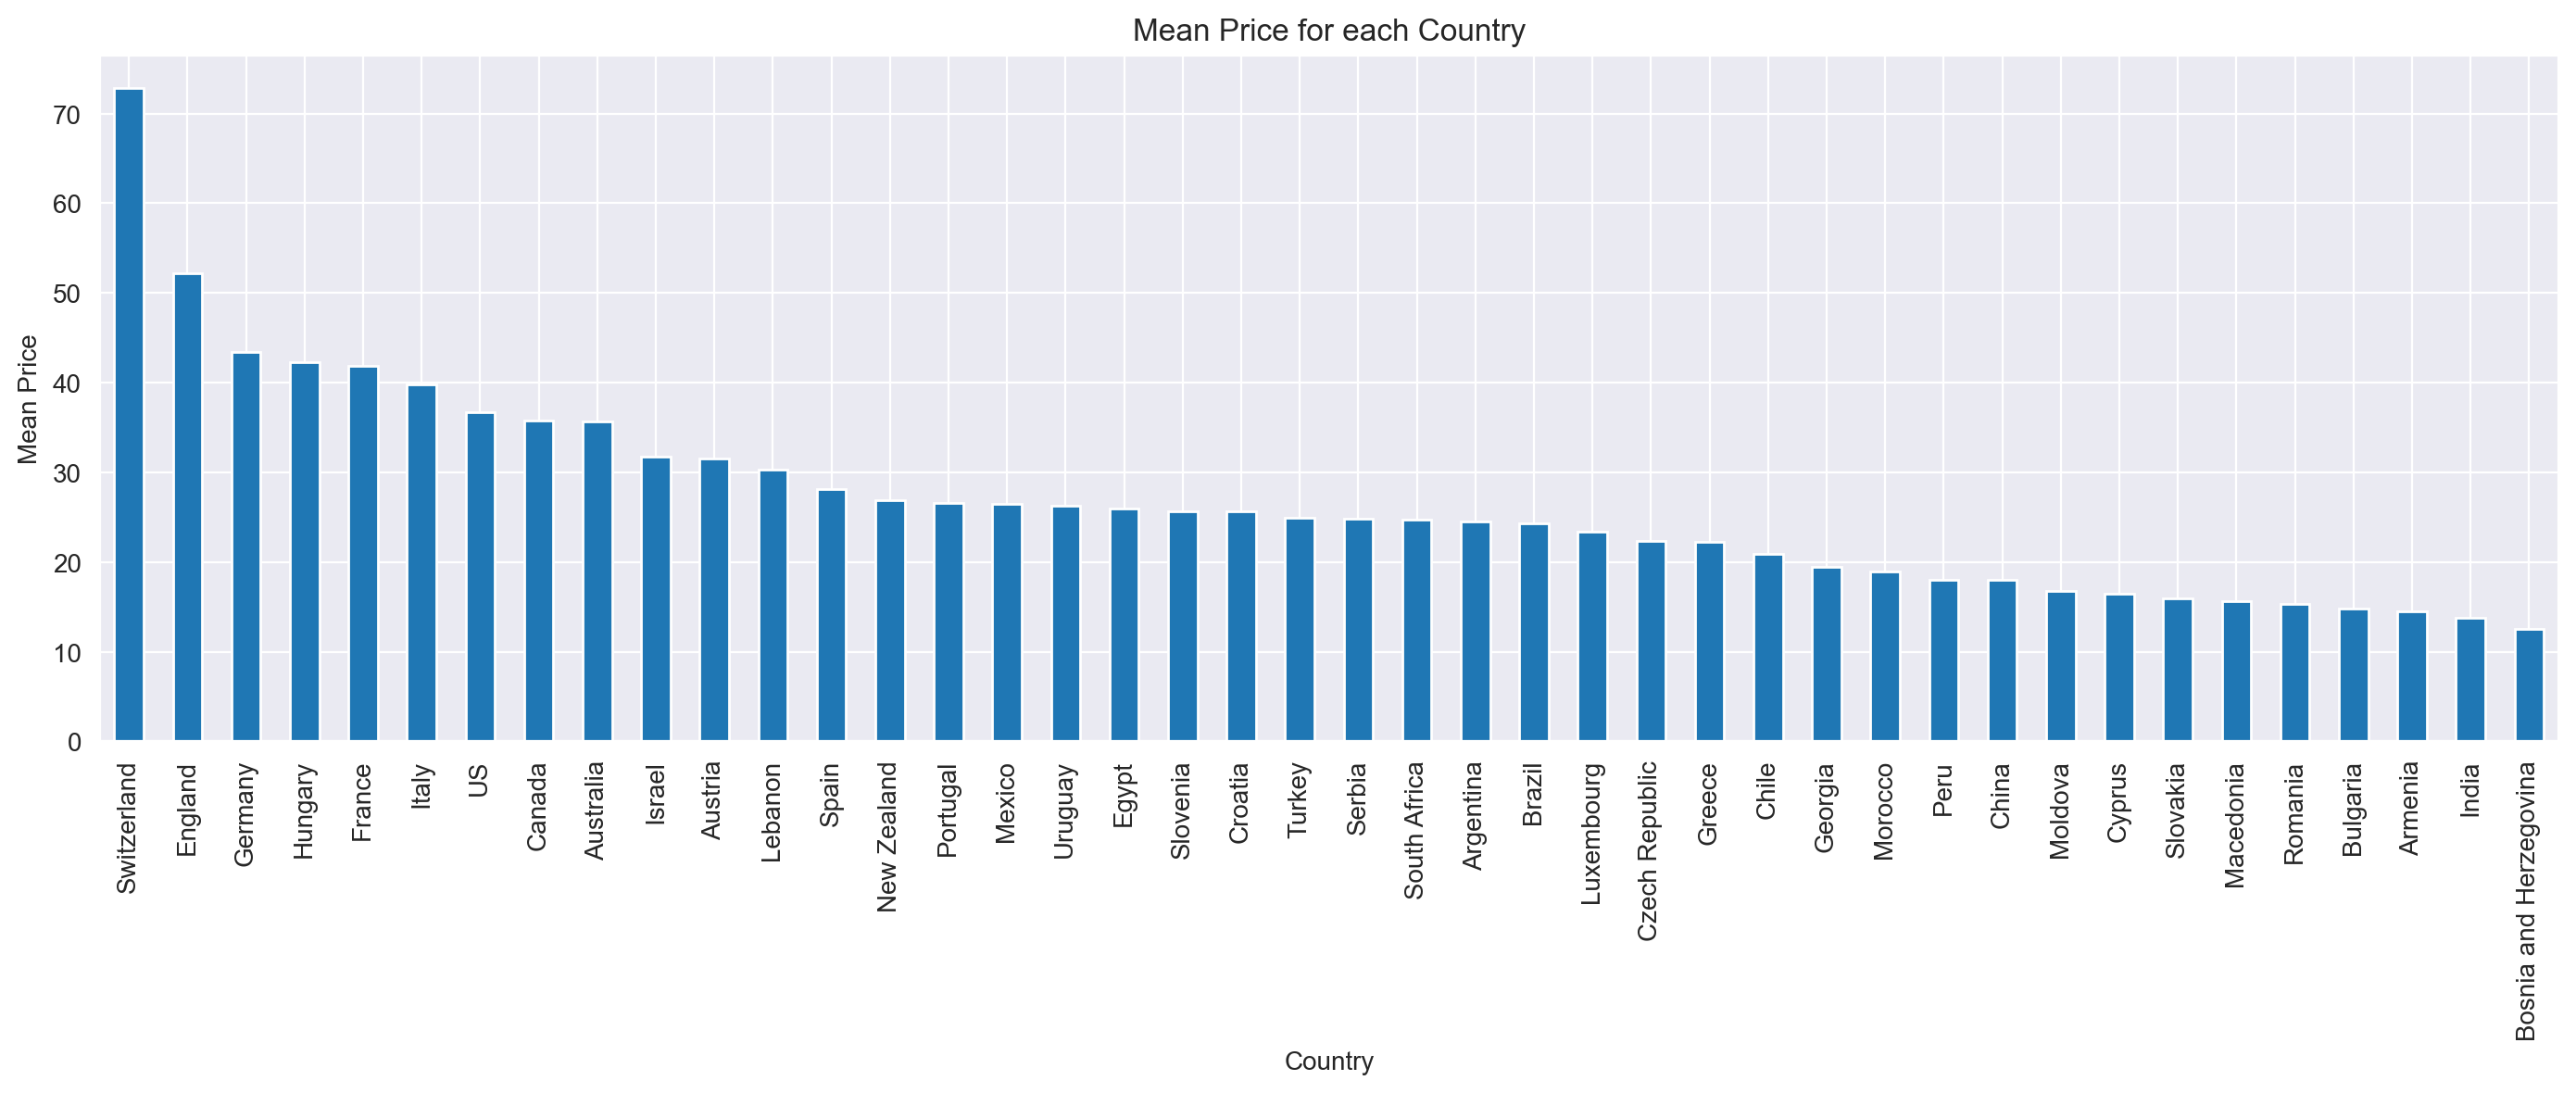

In [225]:
fig, ax = plt.subplots(figsize=(14, 6))
# Only one Egypt wine with price NaN, then use [0:-1]
df_wine.groupby(['country'])['price'].agg(np.mean).sort_values(ascending=False)[0:-1].plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price for each Country')

fig.tight_layout()

In [226]:
df_wine[df_wine['country'] == 'Egypt']

,country,description,designation,points,price,province,region_1,region_2,title,variety,...,130,131,132,133,134,135,136,137,138,139
102997,Egypt,"Ripe pear, apple and tropical fruit in the nos...",Caspar Blanc de Noirs,84,26.0,Egypt,None,None,Sahara Vineyards 2008 Caspar Blanc de Noirs Gr...,Grenache,...,0.0,0.0,0.0,0.10605,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
df_wine.groupby(['province']).points.agg([len, min, max]).sort_values(by = ['len'], ascending=False)

,len,min,max
province,,,
California,33656,80,100
Washington,7965,80,100
Bordeaux,5556,80,100
Tuscany,5391,80,100
Oregon,4929,80,99
...,...,...,...
Corinthia,1,86,86
Rhode Island,1,90,90
Viile Timis,1,84,84


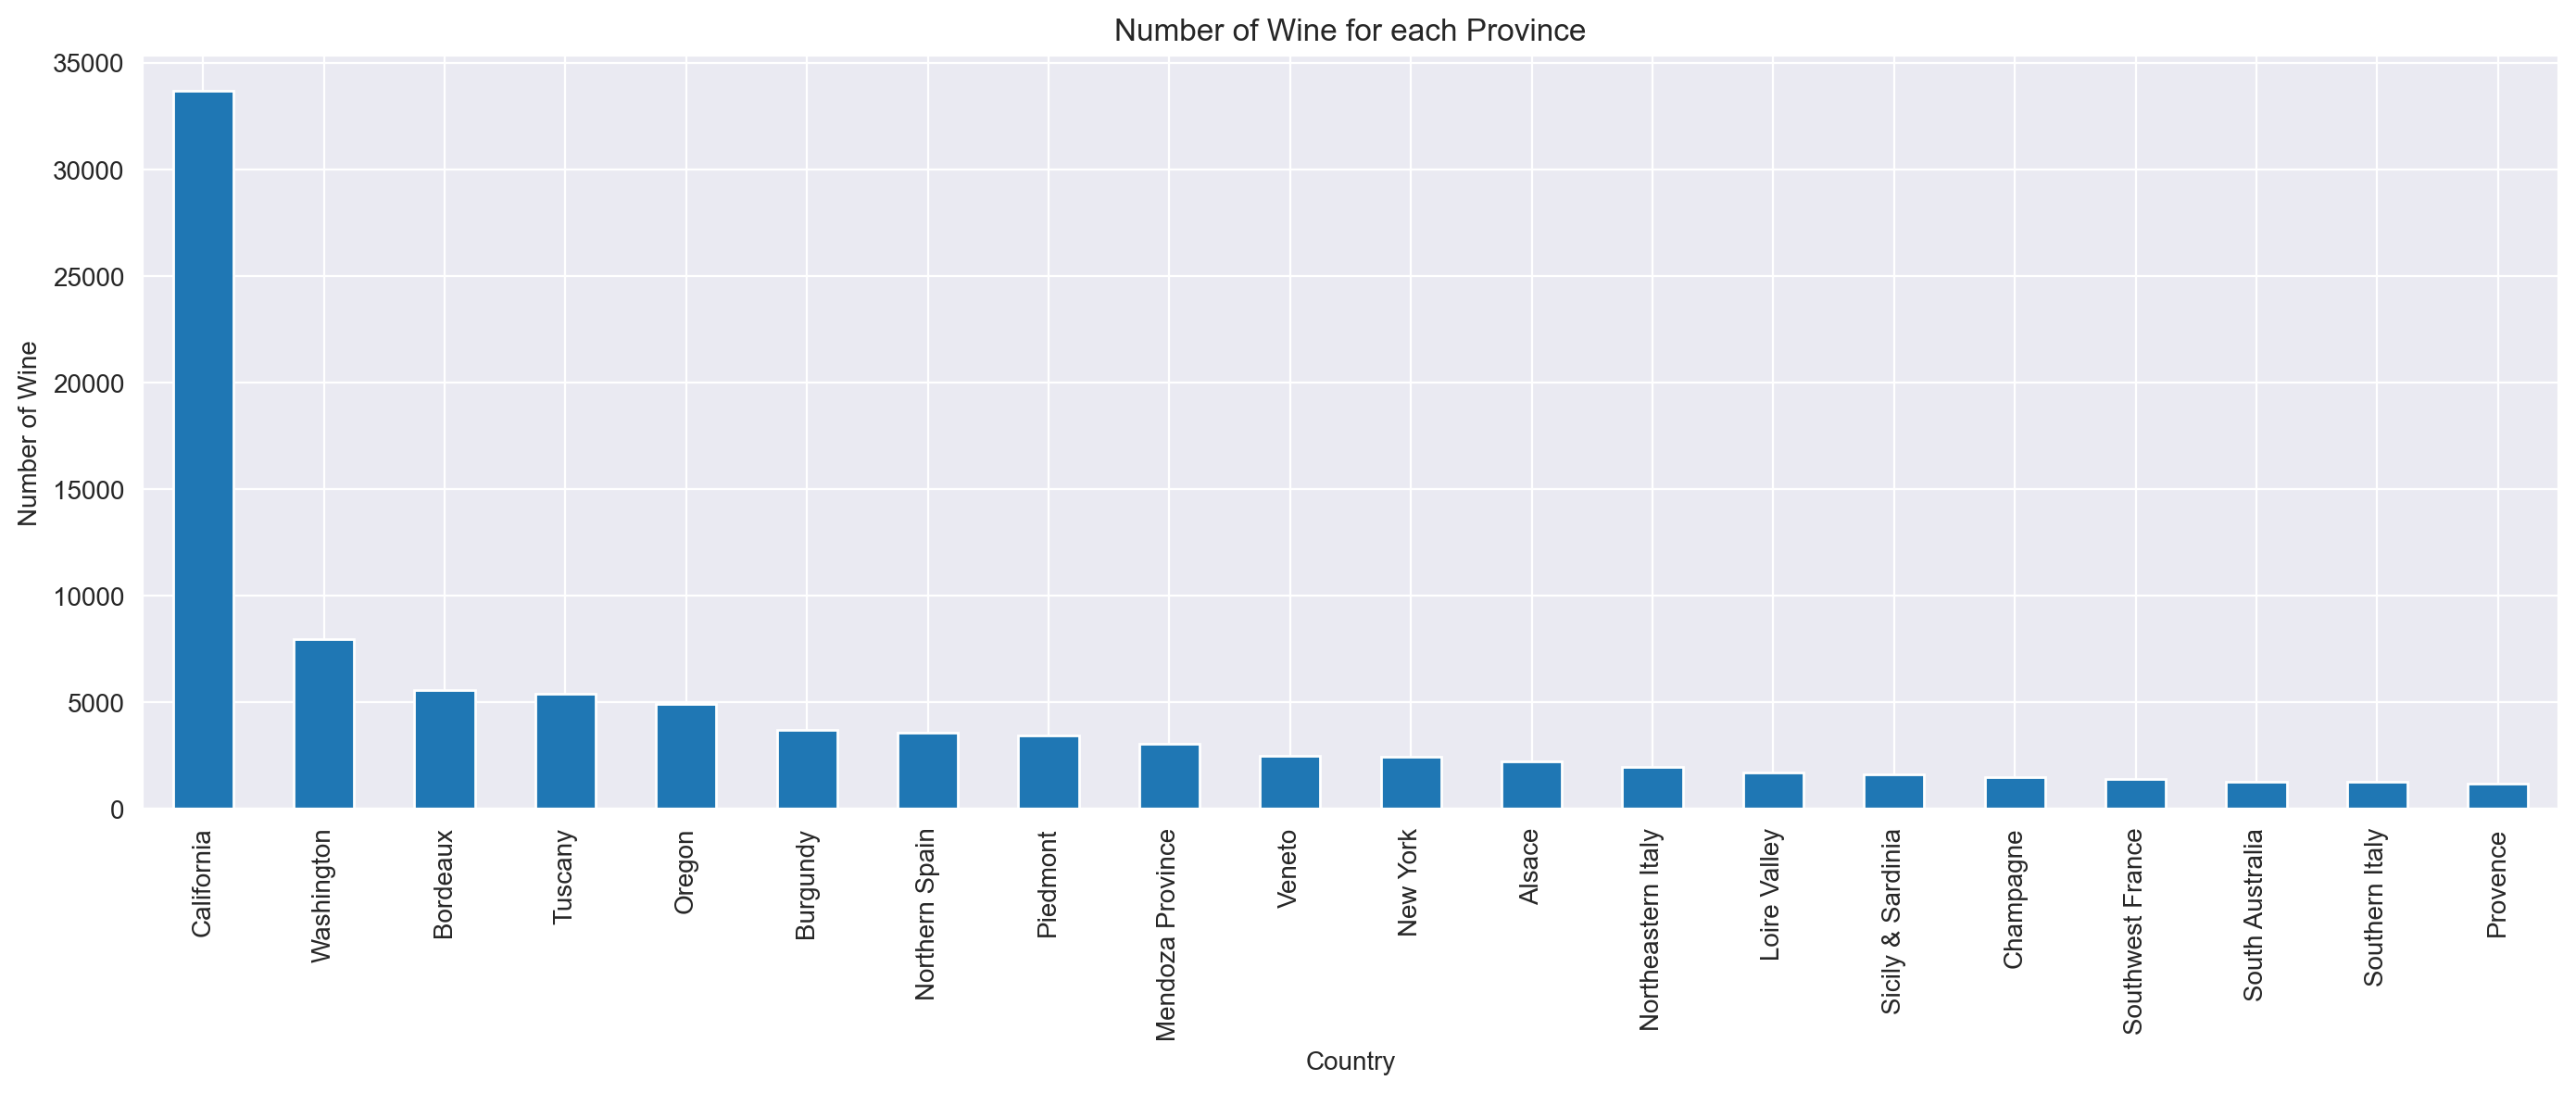

In [228]:
fig, ax = plt.subplots(figsize=(14, 6))
df_wine.groupby(['province'])['points'].agg(len).sort_values(ascending=False)[0:20].plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Number of Wine')
ax.set_title('Number of Wine for each Province')

fig.tight_layout()

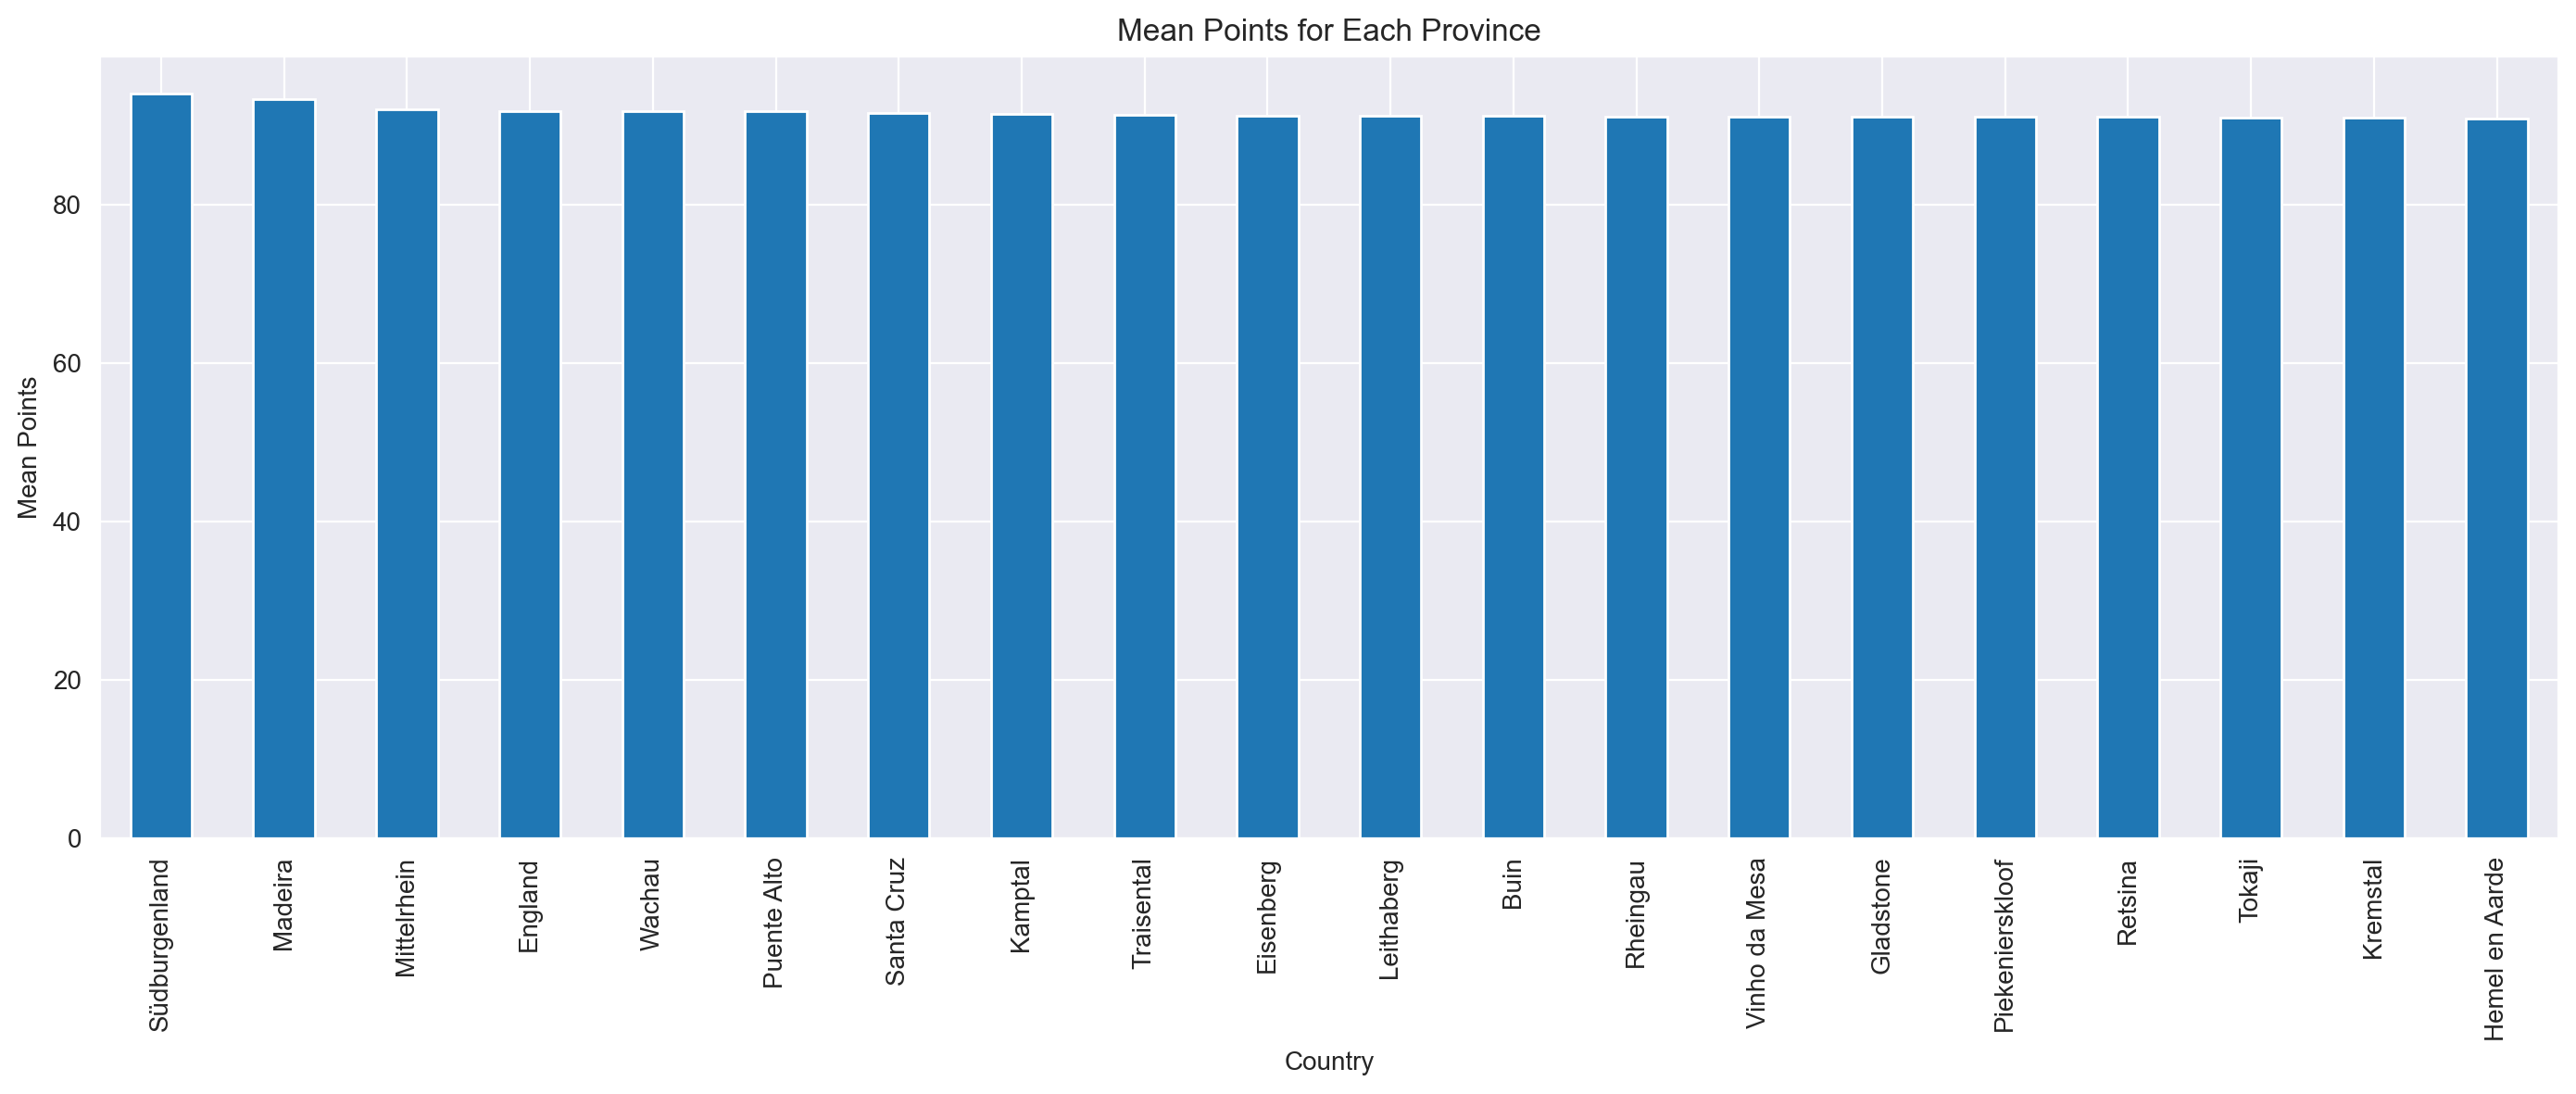

In [229]:
fig, ax = plt.subplots(figsize=(14, 6))
df_wine.groupby(['province'])['points'].agg(np.mean).sort_values(ascending=False)[0:20].plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Mean Points')
ax.set_title('Mean Points for Each Province')

fig.tight_layout()

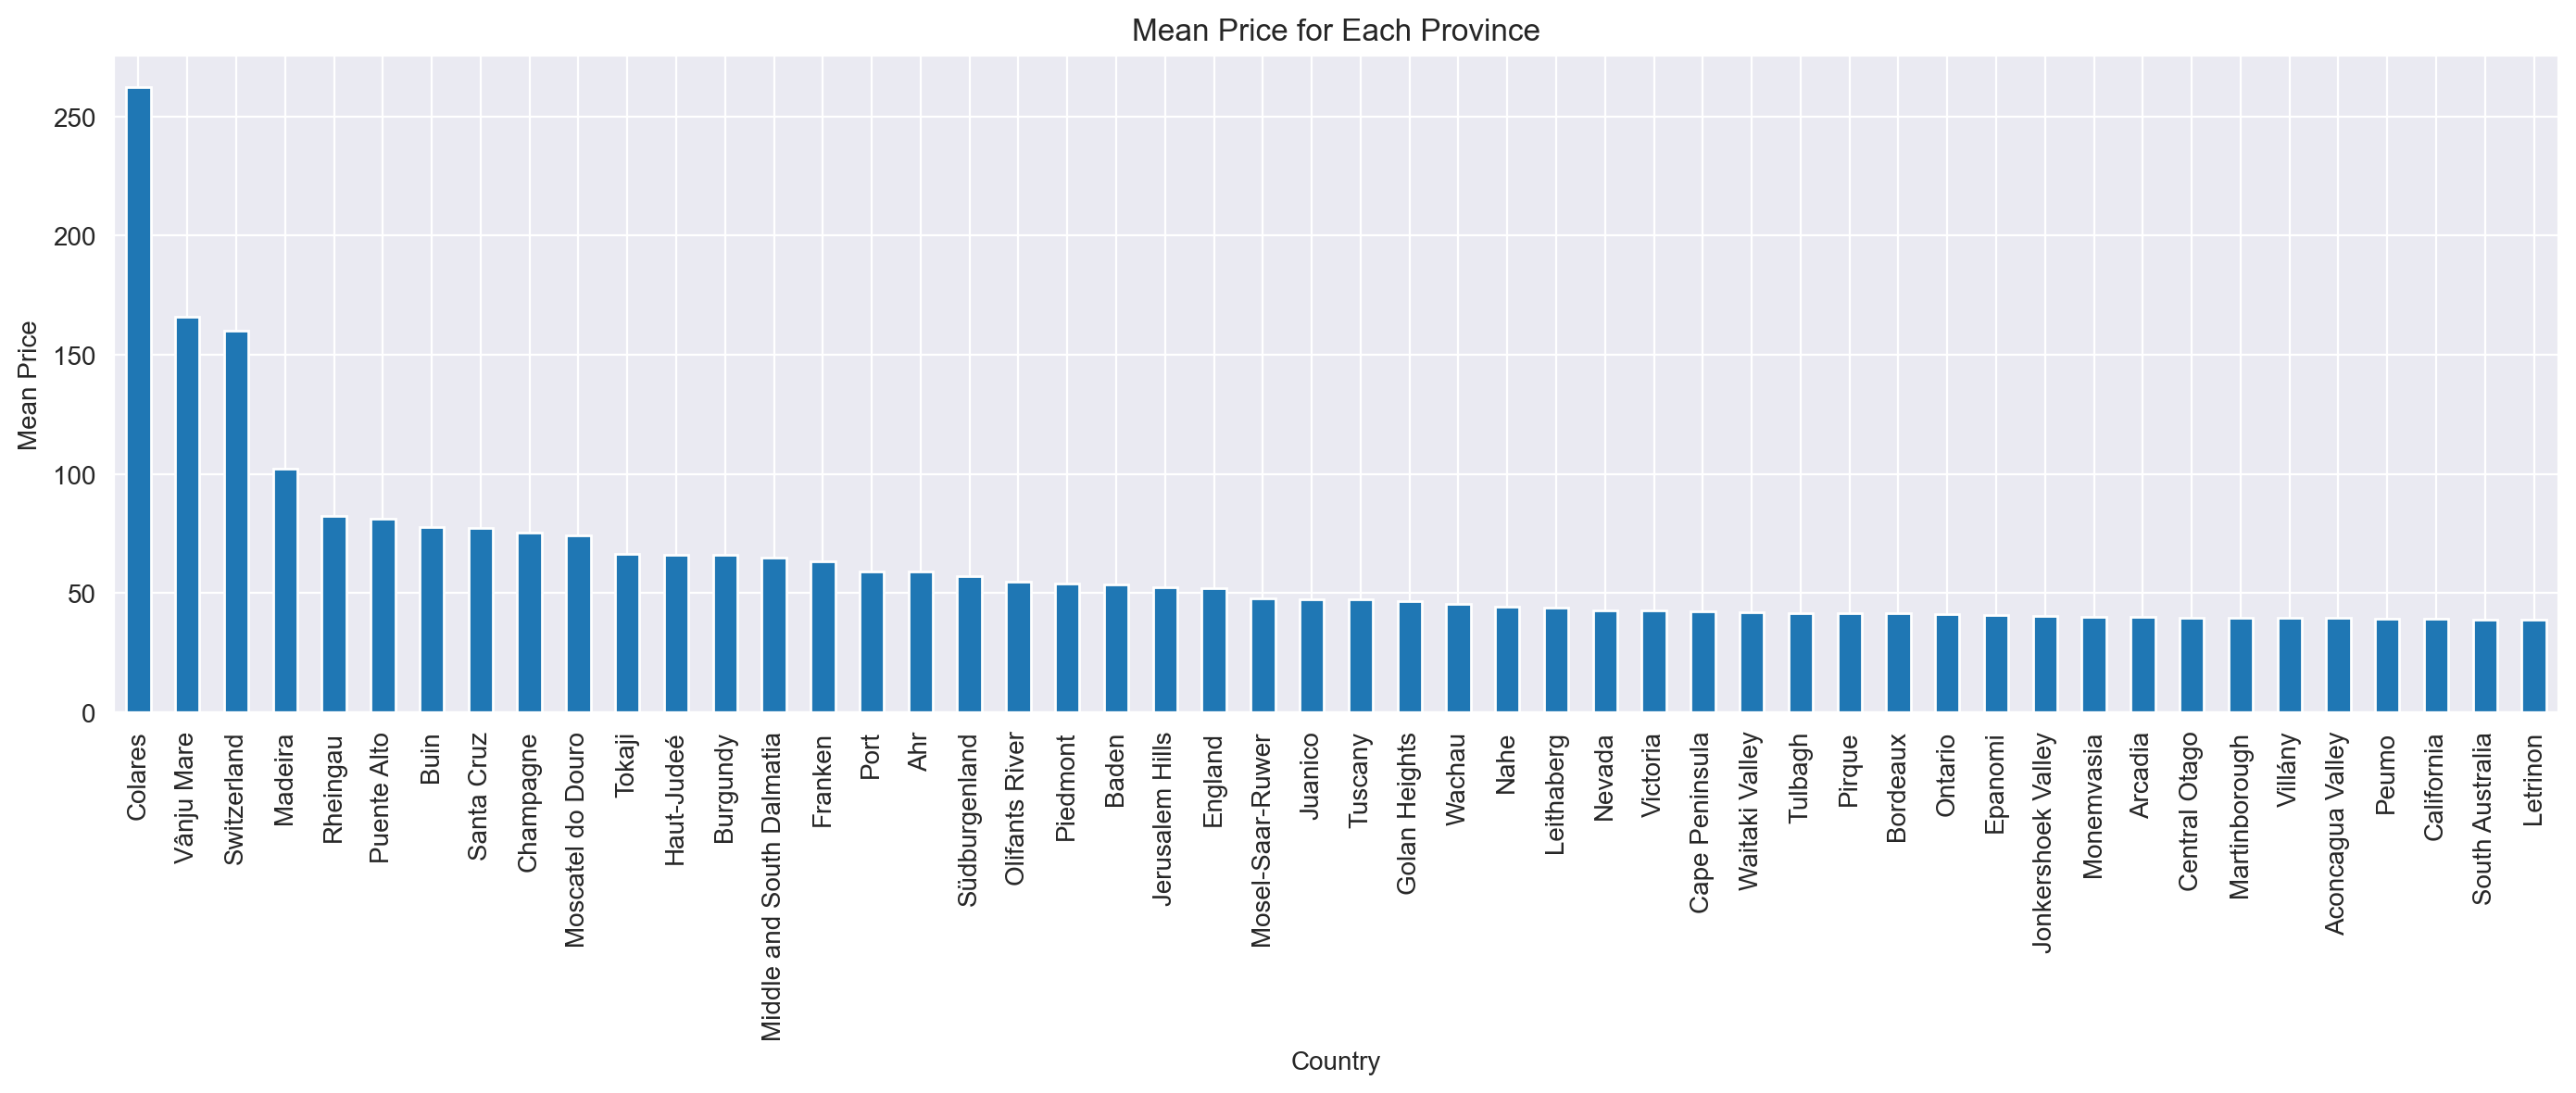

In [230]:
fig, ax = plt.subplots(figsize=(14, 6))
df_wine.groupby(['province'])['price'].agg(np.mean).sort_values(ascending=False)[0:50].plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price for Each Province')

fig.tight_layout()

In [231]:
df_wine.groupby(['region_1']).points.agg([len, min, max]).sort_values(by = ['len'], ascending=False)

,len,min,max
region_1,,,
None,19500,80,100
Napa Valley,4174,80,100
Columbia Valley (WA),3795,80,100
Russian River Valley,2862,80,98
California,2468,80,97
...,...,...,...
Geographe,1,90,90
Geelong,1,85,85
Terrasses du Larzac,1,87,87


In [232]:
sum(df_wine.groupby(['region_1']).points.agg(len).sort_values(ascending=False) < 200)

1131

In [233]:
df_wine.groupby(['region_2']).points.agg([len, min, max]).sort_values(by = ['len'], ascending=False)

,len,min,max
region_2,,,
None,73159,80,100
Central Coast,10233,80,97
Sonoma,8390,80,100
Columbia Valley,7466,80,100
Napa,6369,80,100
Willamette Valley,3142,80,96
California Other,2499,80,97
Finger Lakes,1642,80,94
Sierra Foothills,1345,80,97


#### 3.2.2 Variety

In [234]:
df_wine["variety"].value_counts().head(25)

Pinot Noir                    12275
Chardonnay                    10865
Cabernet Sauvignon             8838
Red Blend                      8233
Bordeaux-style Red Blend       6471
Riesling                       4772
Sauvignon Blanc                4571
Syrah                          3828
Rosé                           3219
Merlot                         2895
Nebbiolo                       2607
Zinfandel                      2530
Sangiovese                     2462
Malbec                         2446
Portuguese Red                 2282
White Blend                    2174
Sparkling Blend                1971
Tempranillo                    1670
Rhône-style Red Blend          1342
Pinot Gris                     1322
Champagne Blend                1308
Cabernet Franc                 1242
Grüner Veltliner               1201
Portuguese White               1057
Bordeaux-style White Blend      993
Name: variety, dtype: int64

In [235]:
# Number of unique wine varieties in the reviews:
unique_wines = df_wine['variety'].dropna().unique()
print('Unique wine varieties in the reviews: \n{}'.format(len(unique_wines)))

Unique wine varieties in the reviews: 
701


#### 3.2.3 Price

<AxesSubplot:>

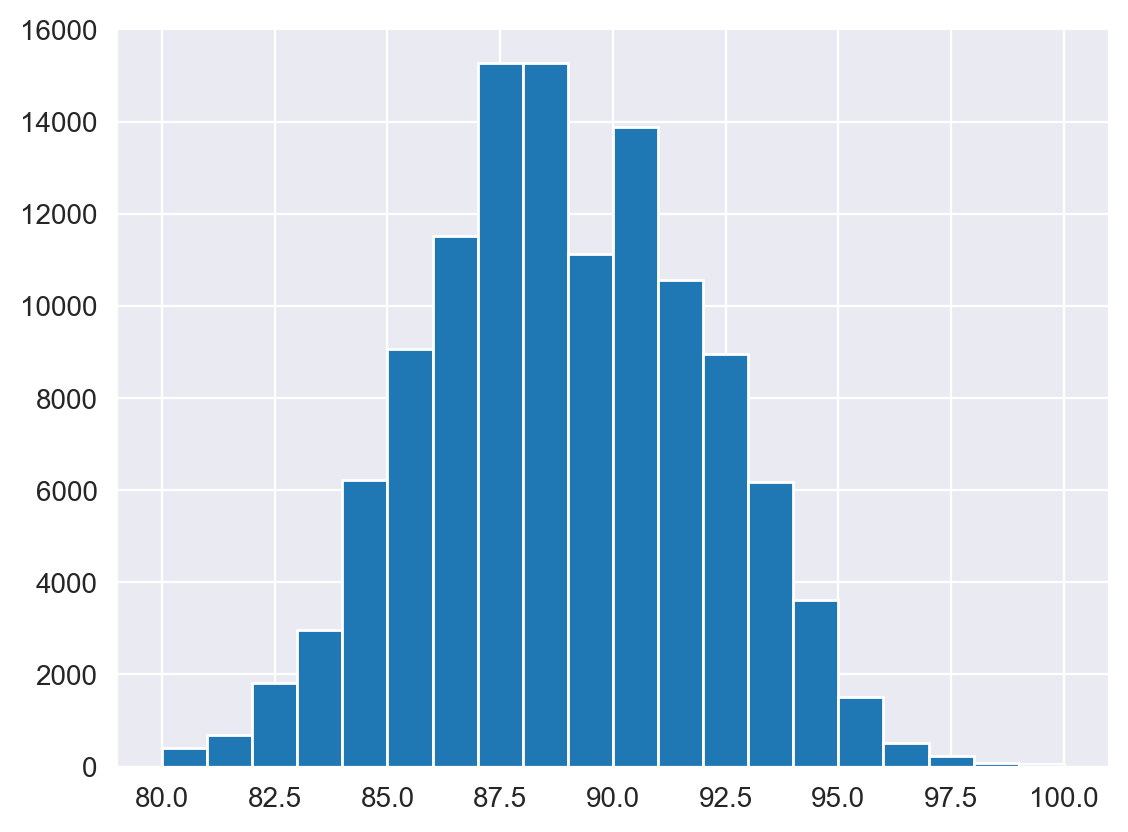

In [236]:
df_wine['points'].hist(bins = 20)

<AxesSubplot:>

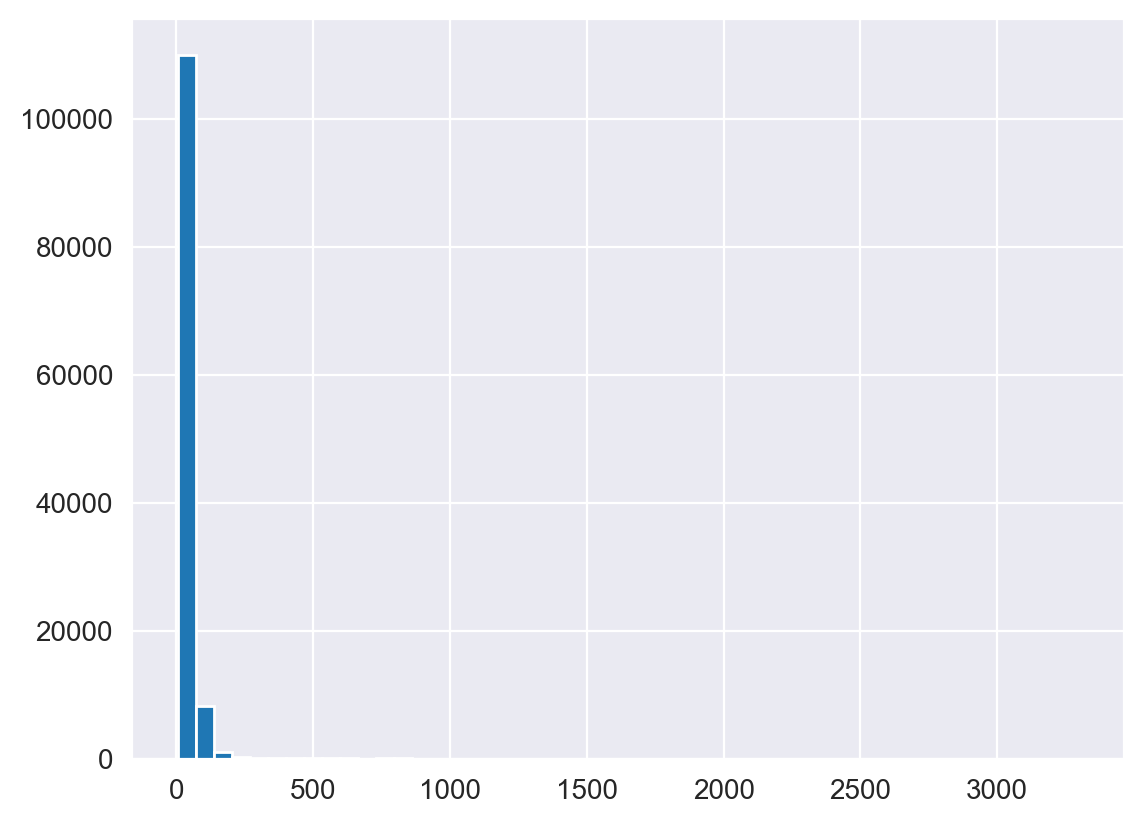

In [237]:
df_wine['price'].hist(bins = 50)

<AxesSubplot:>

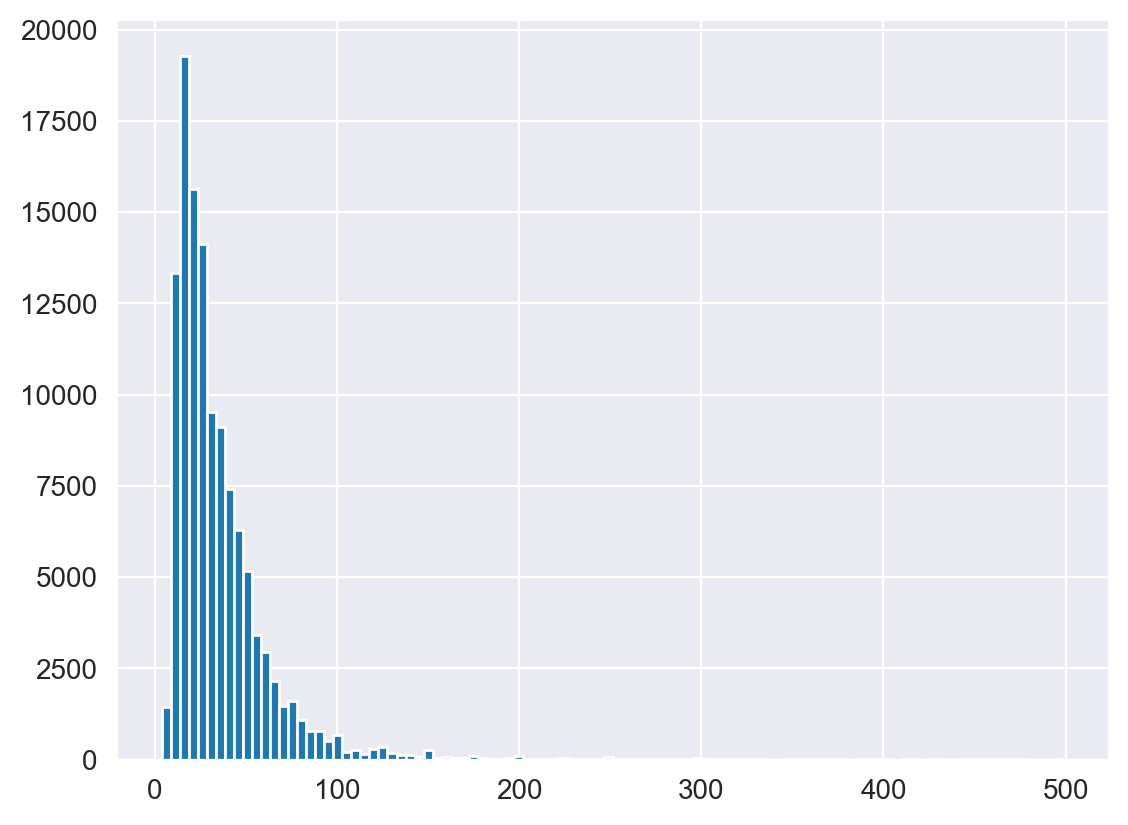

In [238]:
df_wine[df_wine['price'] < 500].price.hist(bins = 100)

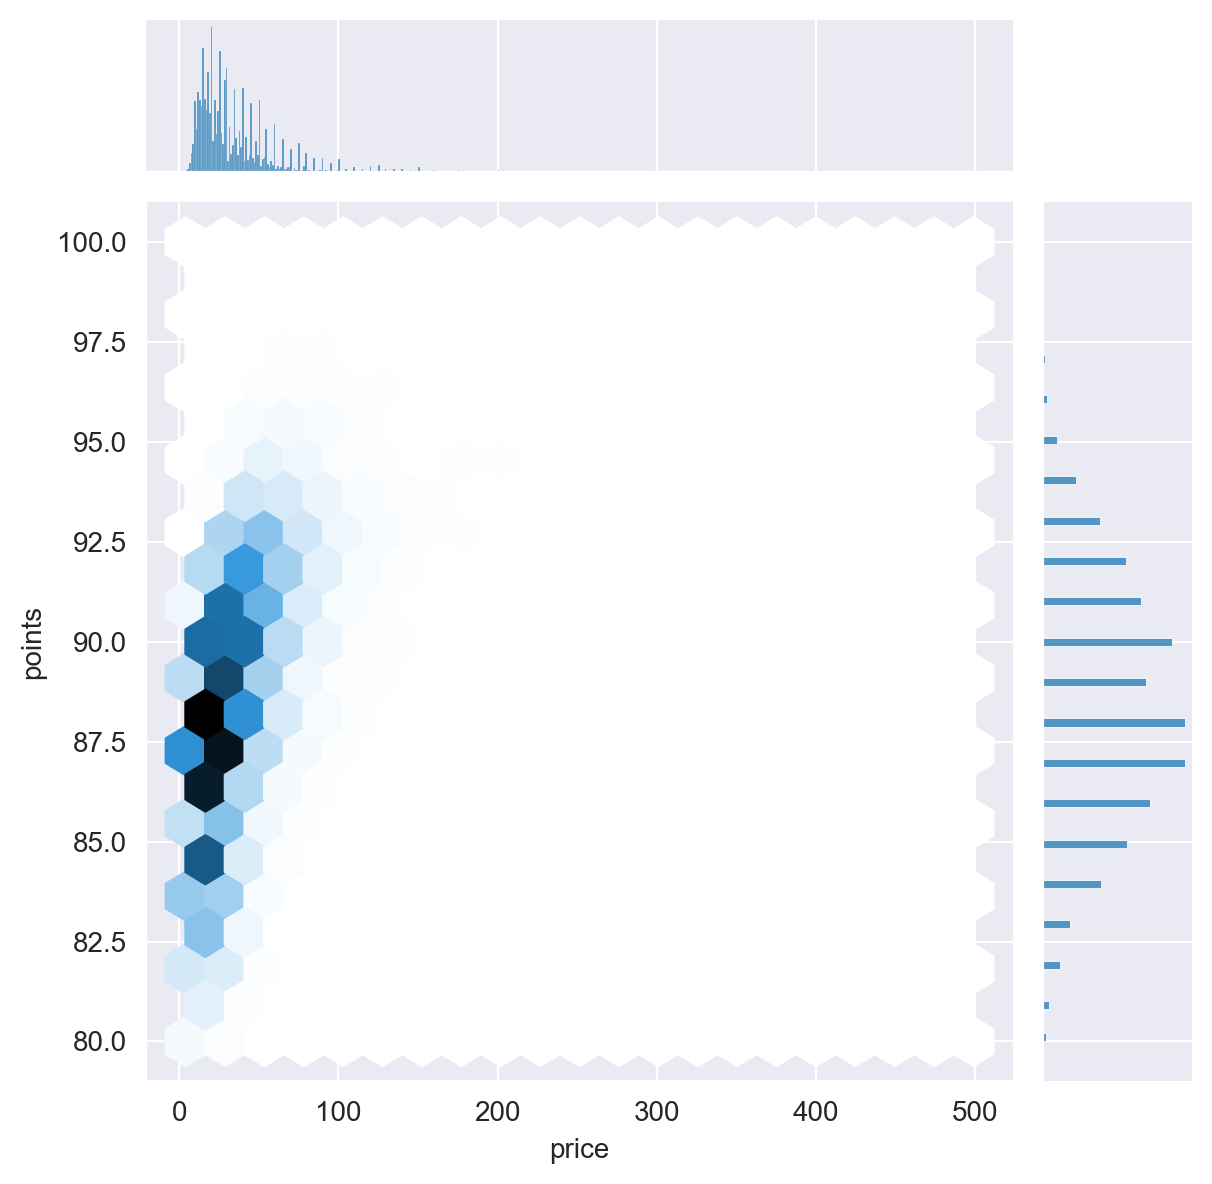

In [239]:
sns.jointplot(x = 'price', y = 'points', data = df_wine[df_wine['price'] < 500], kind = 'hex', gridsize = 20)

<AxesSubplot:>

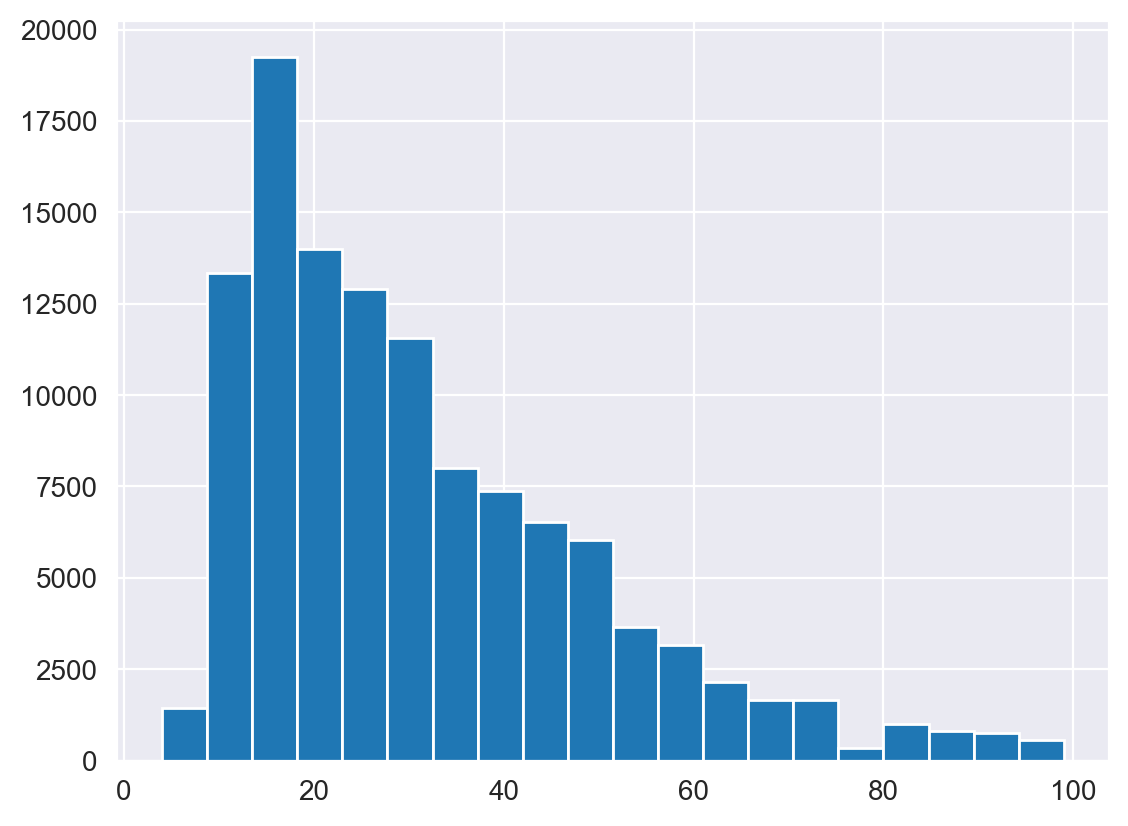

In [240]:
df_wine[df_wine['price'] < 100].price.hist(bins = 20)

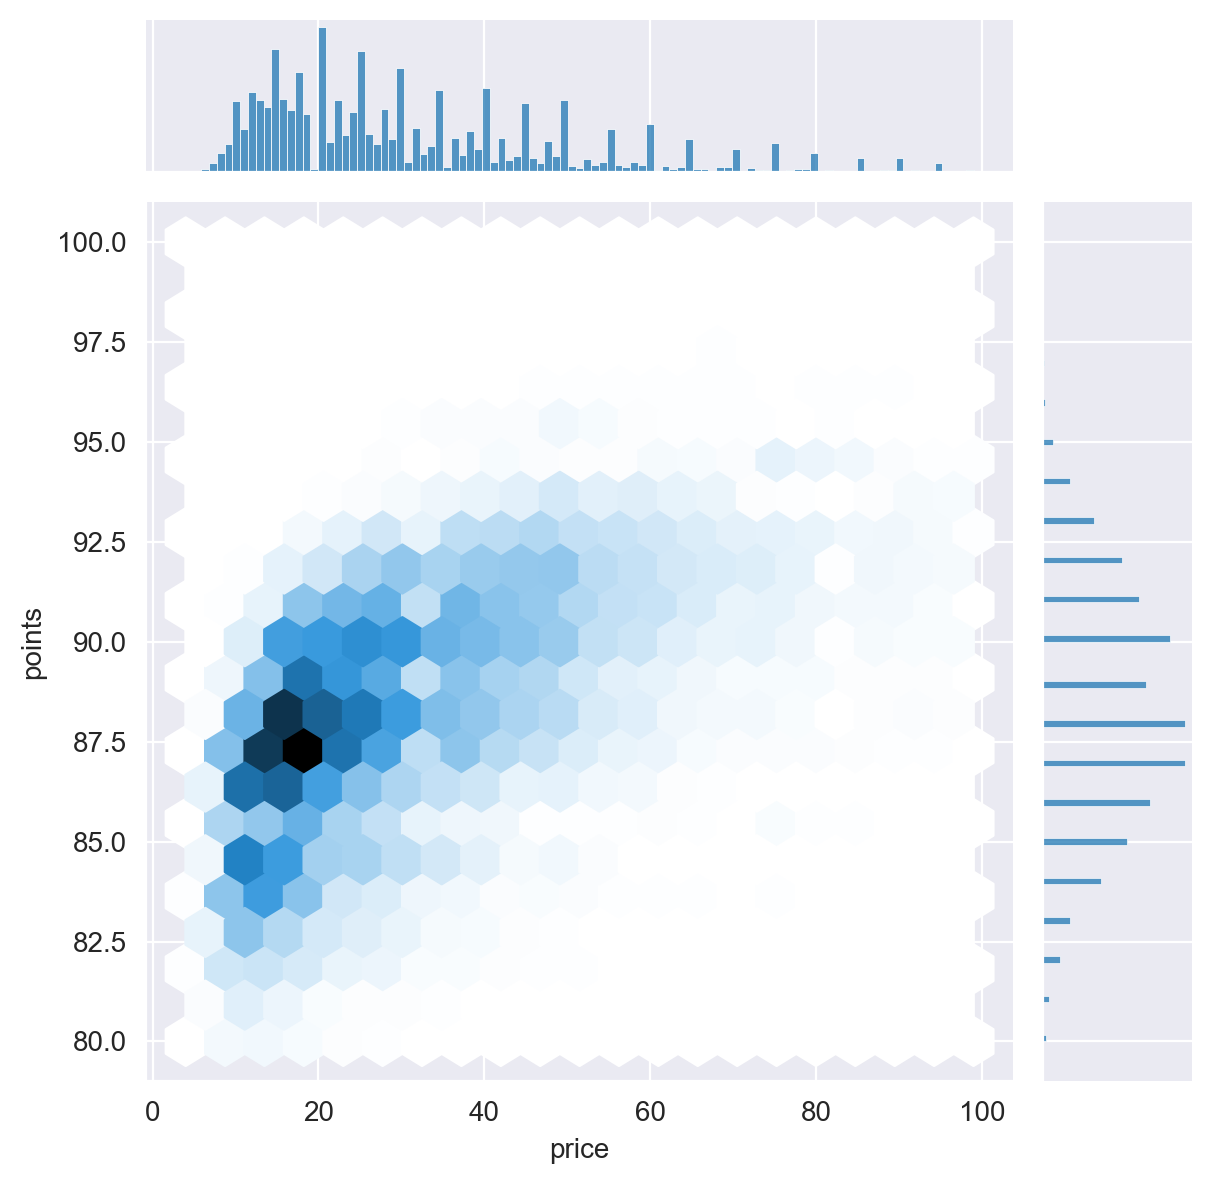

In [241]:
sns.jointplot(x = 'price', y = 'points', data = df_wine[df_wine['price'] < 100], kind = 'hex', gridsize = 20)

<AxesSubplot:>

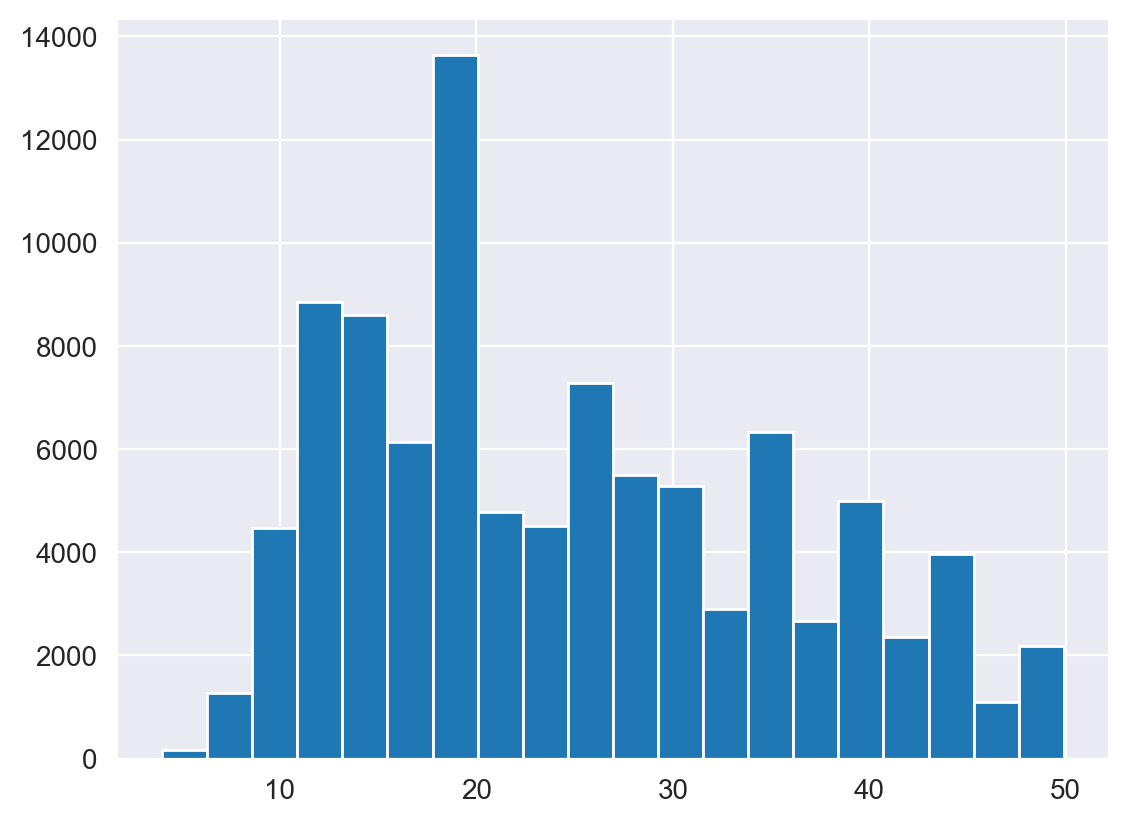

In [242]:
df_wine[df_wine['price'] < 50].price.hist(bins = 20)

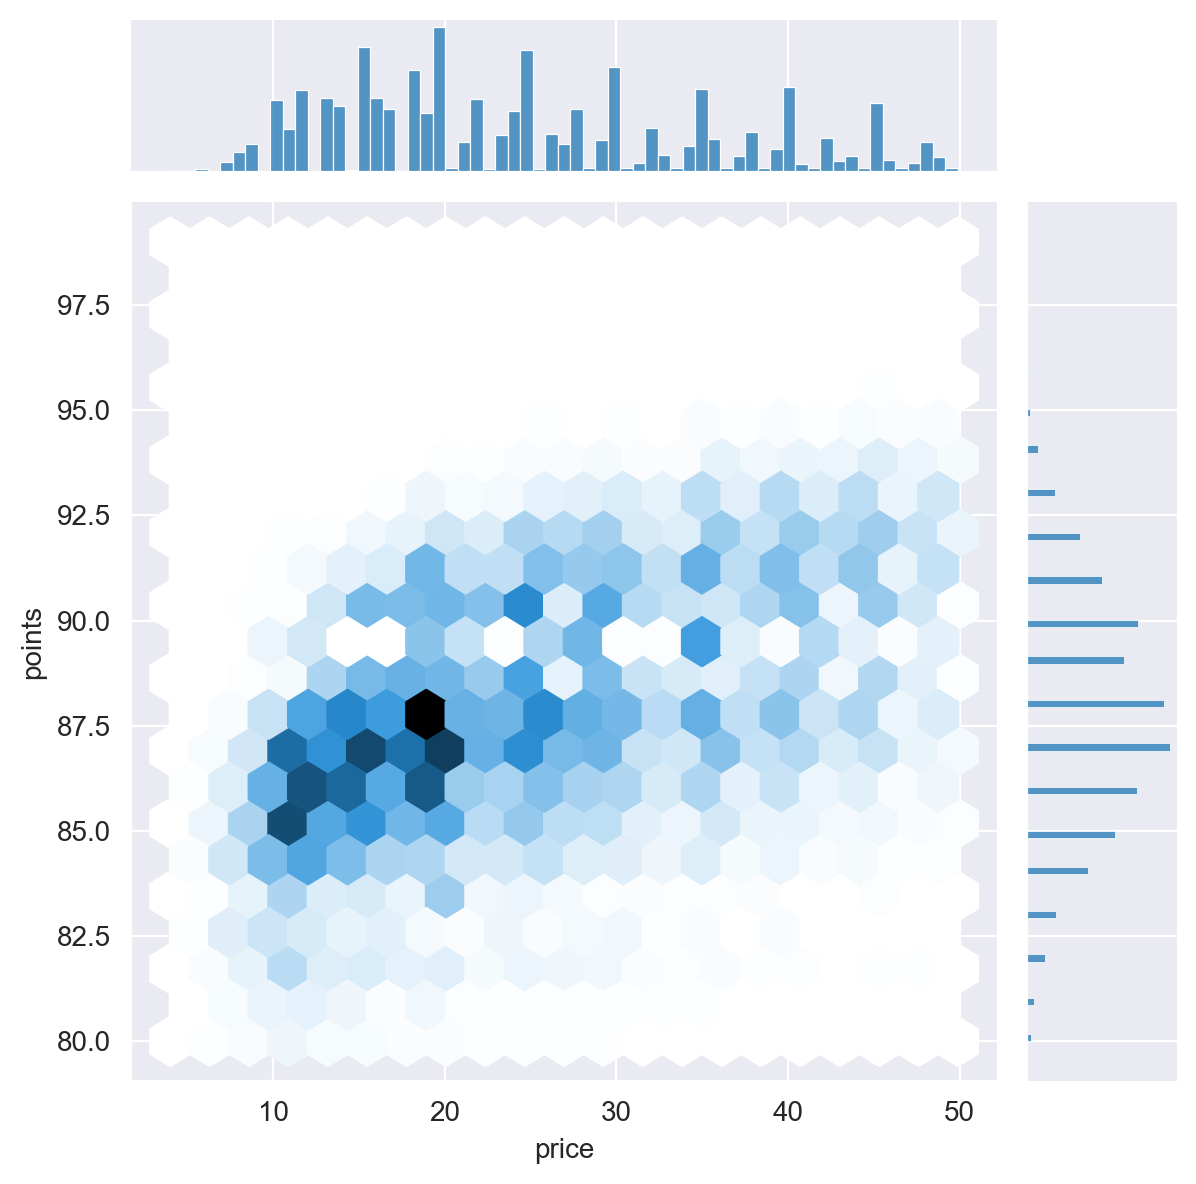

In [243]:
sns.jointplot(x = 'price', y = 'points', data = df_wine[df_wine['price'] < 50], kind = 'hex', gridsize = 20)

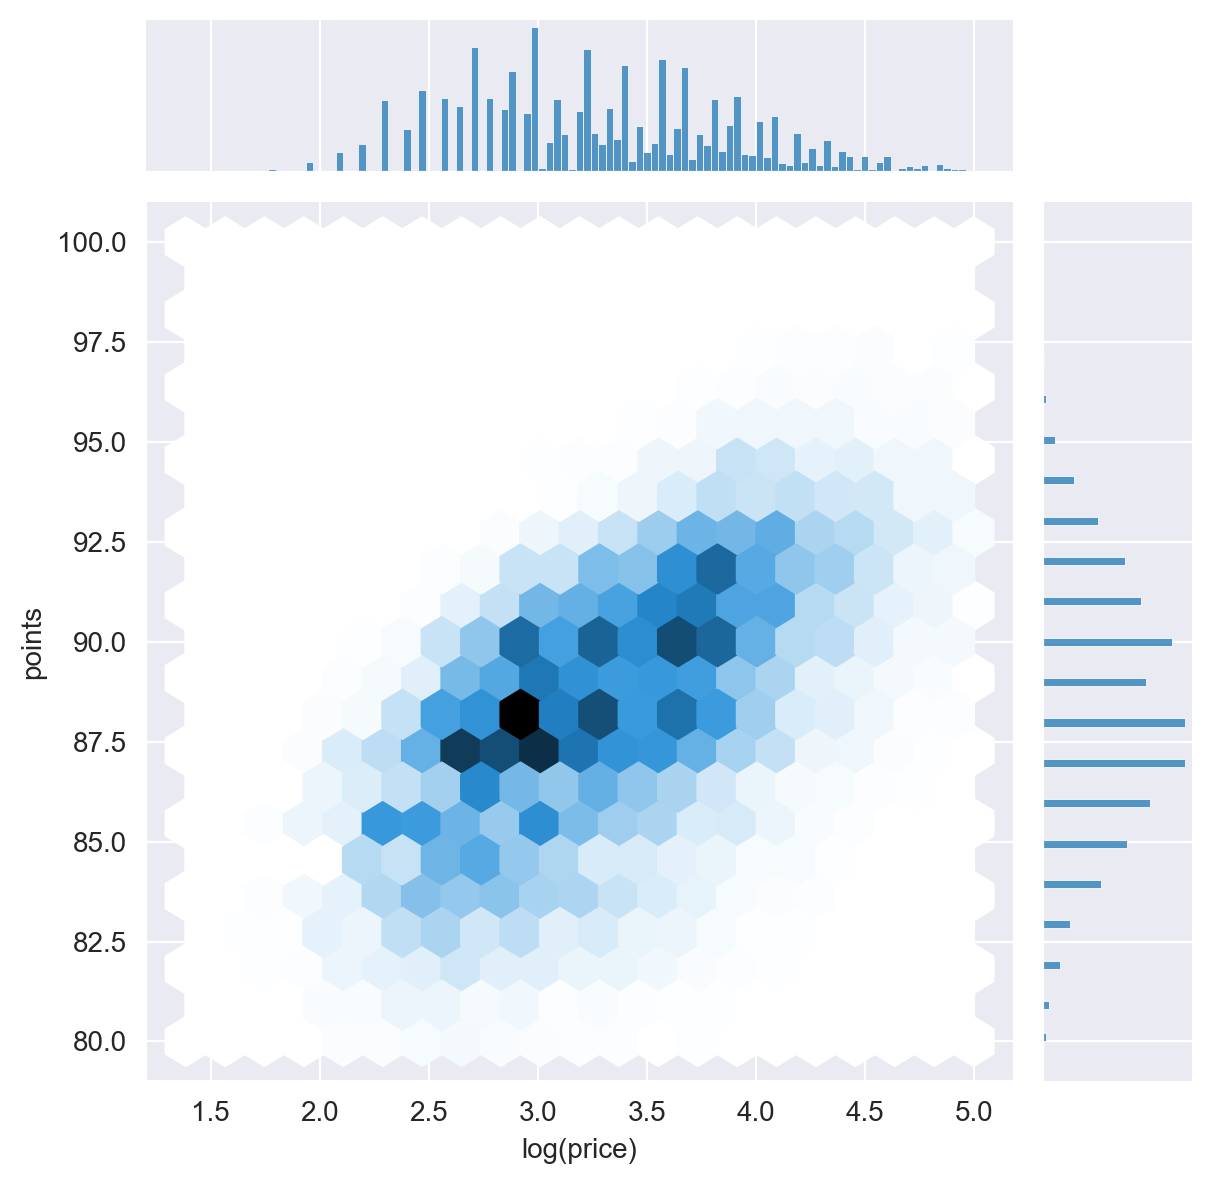

In [244]:
# points vs log(price)
price_points = pd.DataFrame({'price': df_wine.price,
                             'log(price)': np.log(df_wine.price),
                             'points': df_wine.points})
sns.jointplot(x = 'log(price)',
              y = 'points',
              data = price_points[price_points['log(price)'] < 5],
              kind = 'hex', gridsize = 20)

#### 3.2.4 Topics Wordcloud

In [5]:
from wordcloud import WordCloud, STOPWORDS

In [8]:
lda_model = LdaMulticore.load('optimal_ldamodel', mmap='r')

In [8]:
df_topic = df_wine.iloc[:,20:]
to_10_topic = list(df_topic.agg(sum).sort_values(ascending=False)[0:10].index)
id2words = {i:lda_model.show_topic(topicid=int(i), topn=20) for i in to_10_topic}
id2words

{'36': [('wine', 0.08154535),
  ('tannins', 0.04800661),
  ('black', 0.03168849),
  ('fruits', 0.030430784),
  ('drink', 0.029623613),
  ('fruit', 0.029479269),
  ('ripe', 0.029132942),
  ('acidity', 0.025078267),
  ('firm', 0.024495242),
  ('rich', 0.024359452),
  ('structure', 0.023165904),
  ('wood', 0.021762628),
  ('aging', 0.019186668),
  ('dense', 0.018054064),
  ('well', 0.017882502),
  ('structured', 0.017084586),
  ('juicy', 0.015746359),
  ('flavors', 0.014498574),
  ('dark', 0.012811679),
  ('age', 0.011440004)],
 '91': [('wine', 0.08621974),
  ('acidity', 0.05338854),
  ('drink', 0.051641226),
  ('fruity', 0.05013617),
  ('soft', 0.039752252),
  ('red', 0.035400104),
  ('ready', 0.033748023),
  ('attractive', 0.033374548),
  ('ripe', 0.02486944),
  ('fresh', 0.024665834),
  ('light', 0.024636801),
  ('fruits', 0.023640903),
  ('crisp', 0.023580944),
  ('bright', 0.018292591),
  ('fruit', 0.018037554),
  ('flavors', 0.017634321),
  ('aftertaste', 0.017401213),
  ('character

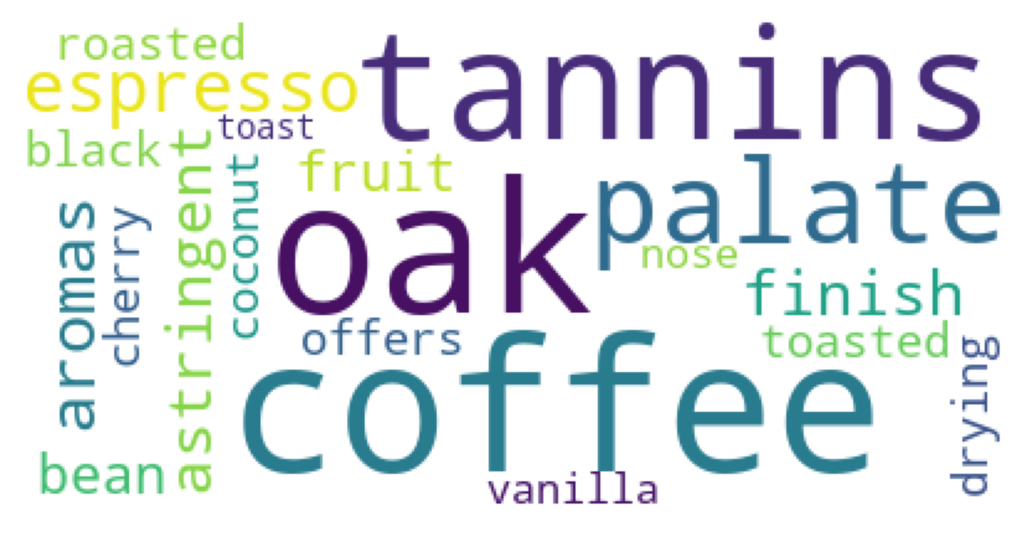

In [12]:
id2words = {'topic':lda_model.show_topic(topicid=39, topn=20)}
draw_wordcloud(list(id2words.values())[0])

In [10]:
# define a function to generate the wordlsit for word cloud
def generate_wordlist(word_freq):
    from random import shuffle
    word_list=[]
    prob_total = 0
    for word, prob in word_freq:
        prob_total +=prob
    for word, prob in word_freq:
        freq = int(prob/prob_total*100)
        alist=[word]
        word_list.extend(alist*freq)
    shuffle(word_list)
    text = ' '.join(word_list)
    return text


#define a function to generate one word cloud
def draw_wordcloud(word_freq):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline

    text = generate_wordlist(word_freq)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

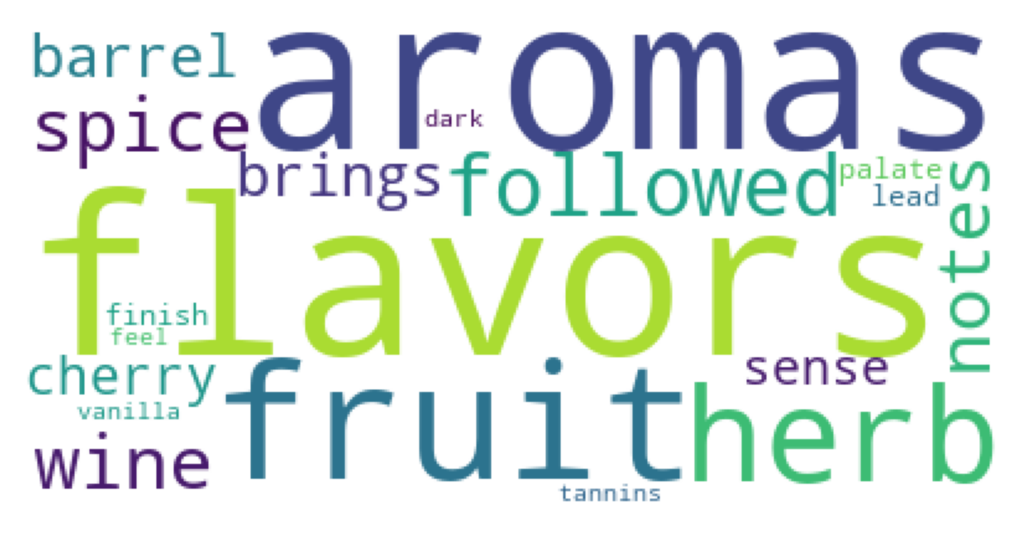

In [40]:
draw_wordcloud(list(id2words.values())[8])

In [67]:
# define a function to display multiple word clouds
def display_wordclouds(id2words, ncol, title=''):
    plt.figure(figsize=(10,10))
    n_components = len(id2words.values())
    j = int(np.ceil(n_components/ncol))
    for t, (id, words) in enumerate(id2words.items()):
        i=t+1
        plt.subplot(j, ncol, i).set_title("Topic #" + id)
        plt.plot()
        text = generate_wordlist(words)
        wordcloud = WordCloud(stopwords=STOPWORDS,
                              background_color='white',
                              colormap="Dark2",
                              max_words=20).generate(text)
        plt.imshow(wordcloud)
        plt.axis("off")
    fig.suptitle(title)
    plt.tight_layout()

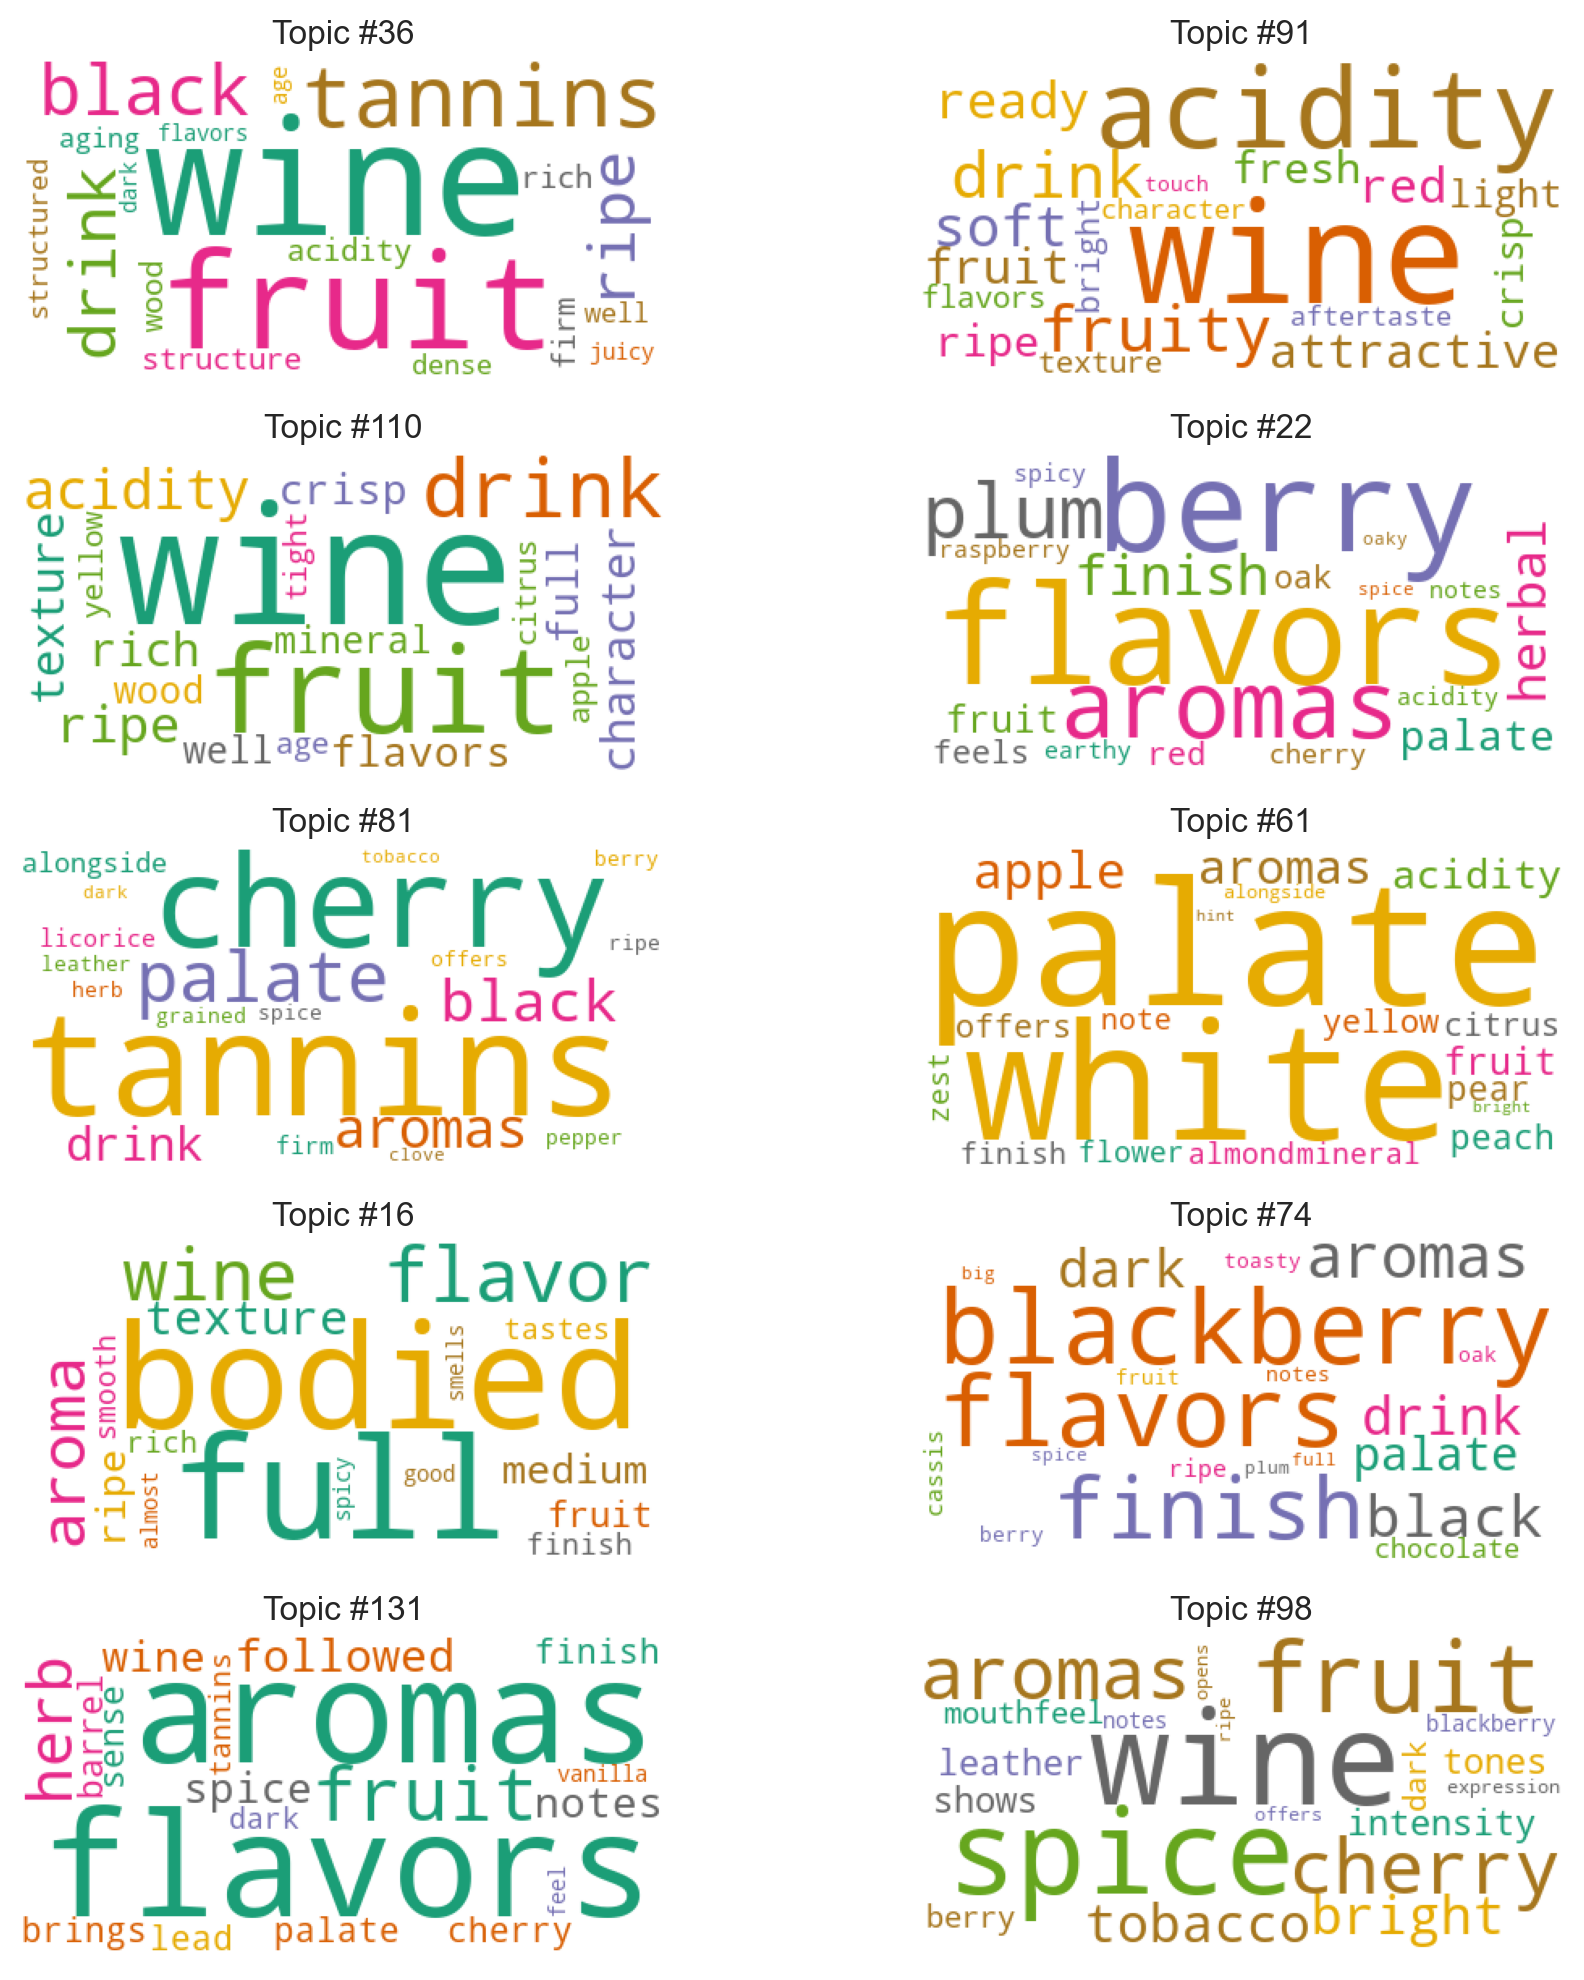

In [68]:
display_wordclouds(id2words, 2)

### 3.3 Clean Null

#### 3.3.1 Brief

In [ ]:
def null_table(df):
    return pd.DataFrame({'number': df.isnull().sum(),
                         'proportion': np.round(df.isnull().sum() / len(df), 2),
                         'flag': df.isnull().any()})

In [ ]:
null_table(df_wine)

#### 3.3.2 Drop Null Country/Province/Variety

In [ ]:
# small number of null values in country, province, and variety, we decide drop directly
df_wine = df_wine.dropna(subset = ['country', 'province', 'variety'])

In [ ]:
null_table(df_wine)

#### 3.3.3 Drop Tasters' Names and Twitter

In [ ]:
# we don't care tasters' names and twitters, and we don't need the information to answer our question
df_wine = df_wine.drop(columns = ['taster_name', 'taster_twitter_handle'])

In [ ]:
null_table(df_wine)

#### 3.3.4 Fill Null Values in Designation/Region_1/Region_2 with 'None'

In [ ]:
len(df_wine['designation'].unique())

In [ ]:
len(df_wine['region_1'].unique())

In [ ]:
len(df_wine['region_2'].unique())

In [ ]:
# since we have to much null values and unique values in designation, region_1, and region_2, we will fill null values with a new level 'None'
filling_values = {'designation': 'None', 'region_1': 'None', 'region_2': 'None'}
df_wine = df_wine.fillna(value = filling_values)

In [ ]:
null_table(df_wine)

#### 3.3.5 KNN Impute Price

In [ ]:
# df_wine = pd.read_csv('data/wine_clean.csv')
# df_wine = df_wine.iloc[:,1:]

In [ ]:
# since there are not too much null values in price and price is a numerical feature, we could use KNNImputer to fill the null values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df_wine.head()

In [ ]:
%%time
# use 'country', 'continent', 'polarity', 'year', 'normalized rating', 'positive', 'neutral', 'negative', 'compound', and 140 topics to impute 'price'
df_ohe = df_wine[['country', 'continent', 'polarity', 'year']]
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_ohe)
df_ohe = pd.DataFrame(transformed.toarray())

df_impute = pd.concat([df_ohe, df_wine[['normalized rating', 'positive', 'neutral', 'negative', 'compound']]], axis=1)
df_impute = pd.concat([df_impute, df_wine.iloc[:, 20:]], axis=1)

scaler = StandardScaler().fit(df_impute)
df_impute = pd.concat([pd.DataFrame(scaler.transform(df_impute)), df_wine['price']], axis=1)
df_impute.head()

In [ ]:
null_table(df_impute).tail()

In [ ]:
np.sqrt(len(df_impute))

In [ ]:
%%time
imputer = KNNImputer(n_neighbors = 346, weights = 'distance')
imputer_result = imputer.fit_transform(df_impute)

In [ ]:
df_wine['price'] = round(pd.Series(imputer_result[:, 255]), 1)
null_table(df_wine)

In [ ]:
df_wine['price'].describe()

#### 3.3.6 KNN Impute Year

In [ ]:
# since there are not too much null values in year, we could use KNN Imputer to fill the null values
np.mean(df_wine['year'] == 'None')

In [ ]:
def insert_nan(x):
    if x != 'None':
        return x
    else:
        return np.nan

In [ ]:
df_wine['year'] = df_wine['year'].apply(insert_nan)

In [ ]:
null_table(df_wine)

In [162]:
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,...,130,131,132,133,134,135,136,137,138,139
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,39.5,Sicily & Sardinia,Etna,None,Nicosia 2013 Vulkà Bianco (Etna),White Blend,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,...,0.0,0.0,0.0,0.081144,0.000000,0.000000,0.0,0.0,0.0,0.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,...,0.0,0.0,0.0,0.349908,0.092807,0.000000,0.0,0.0,0.0,0.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,...,0.0,0.0,0.0,0.000000,0.000000,0.048212,0.0,0.0,0.0,0.0


In [198]:
for i, year in enumerate(df_wine['year']):
    try:
        if not np.isnan(int(year)):
            df_wine['year'][i] = int(year)
    except:
        continue

In [201]:
%%time
# use 'country', 'continent', 'polarity', 'normalized rating', 'positive', 'neutral', 'negative', 'compound', 'price' and 140 topics to impute 'price'
df_ohe = df_wine[['country', 'continent', 'polarity']]
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_ohe)
df_ohe = pd.DataFrame(transformed.toarray())

df_impute = pd.concat([df_ohe, df_wine[['normalized rating', 'positive', 'neutral', 'negative', 'compound', 'price']]], axis=1)
df_impute = pd.concat([df_impute, df_wine.iloc[:, 20:]], axis=1)

scaler = StandardScaler().fit(df_impute)
df_impute = pd.concat([pd.DataFrame(scaler.transform(df_impute)), df_wine['year']], axis=1)
df_impute.head()

Wall time: 780 ms


,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,year
0,-0.174502,-0.004084,-0.136606,-0.161106,-0.004084,-0.020217,-0.033194,-0.043451,-0.190105,-0.002888,...,-0.217041,-0.198091,-0.258512,-0.234407,-0.13649,-0.180437,-0.12185,-0.152924,-0.200157,2013
1,-0.174502,-0.004084,-0.136606,-0.161106,-0.004084,-0.020217,-0.033194,-0.043451,-0.190105,-0.002888,...,-0.217041,-0.198091,-0.258512,-0.234407,-0.13649,-0.180437,-0.12185,-0.152924,-0.200157,2011
2,-0.174502,-0.004084,-0.136606,-0.161106,-0.004084,-0.020217,-0.033194,-0.043451,-0.190105,-0.002888,...,-0.217041,-0.198091,1.178527,-0.234407,-0.13649,-0.180437,-0.12185,-0.152924,-0.200157,2013
3,-0.174502,-0.004084,-0.136606,-0.161106,-0.004084,-0.020217,-0.033194,-0.043451,-0.190105,-0.002888,...,-0.217041,-0.198091,5.938282,1.388341,-0.13649,-0.180437,-0.12185,-0.152924,-0.200157,2013
4,-0.174502,-0.004084,-0.136606,-0.161106,-0.004084,-0.020217,-0.033194,-0.043451,-0.190105,-0.002888,...,-0.217041,-0.198091,-0.258512,-0.234407,6.28786,-0.180437,-0.12185,-0.152924,-0.200157,2012


In [202]:
%%time
imputer = KNNImputer(n_neighbors = 346, weights = 'distance')
imputer_result = imputer.fit_transform(df_impute)

Wall time: 2min 1s


In [211]:
df_wine['year'] = pd.Series(imputer_result[:, 198]).apply(lambda x: str(int(x)))
null_table(df_wine)

,number,proportion,flag
country,0,0.0,False
description,0,0.0,False
designation,0,0.0,False
points,0,0.0,False
price,0,0.0,False
...,...,...,...
135,0,0.0,False
136,0,0.0,False
137,0,0.0,False
138,0,0.0,False


### 3.4 Feature Engineering

#### 3.4.1 Generate Continent

In [ ]:
country_map =  {
    "Argentina":"South America",
    "Armenia":"Europe",
    "Australia":"Oceania",
    "Austria":"Europe",
    "Bosnia and Herzegovina":"Europe",
    "Brazil":"South America",
    "Bulgaria":"Europe",
    "Canada":"North America",
    "Chile":"South America",
    "China":"Asia",
    "Croatia":"Europe",
    "Cyprus":"Europe",
    "Czech Republic":"Europe",
    "Egypt":"Africa",
    "England":"Europe",
    "France":"Europe",
    "Georgia":"North America",
    "Germany":"Europe",
    "Greece":"Europe",
    "Hungary":"Europe",
    "India":"Asia",
    "Israel":"Asia",
    "Italy":"Europe",
    "Lebanon":"Asia",
    "Luxembourg":"Europe",
    "Macedonia":"Europe",
    "Mexico":"North America",
    "Moldova":"Europe",
    "Morocco":"Africa",
    "New Zealand":"Oceania",
    "Peru":"South America",
    "Portugal":"Europe",
    "Romania":"Europe",
    "Serbia":"Europe",
    "Slovakia":"Europe",
    "Slovenia":"Europe",
    "South Africa":"Africa",
    "Spain":"Europe",
    "Switzerland":"Europe",
    "Turkey":"Asia",
    "US":"North America",
    "Ukraine":"Europe",
    "Uruguay":"South America"
}

In [ ]:
df_wine['continent'] = df_wine.country.map(country_map)
df_wine.head()

In [ ]:
df_wine['continent'].unique()

#### 3.4.2 Normalize Points

In [ ]:
# since 80-100 doesn't make sense to customers, we want to get normalized ratings in an 1 to 10 scale
min_point = df_wine['points'].min()
max_point = df_wine['points'].max()
df_wine['normalized rating'] = (df_wine['points'] - min_point) / (max_point - min_point) * 9 + 1
df_wine.head()

In [ ]:
df_wine['normalized rating'].describe()

#### 3.4.3 Vader Sentiment Analysis

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# stemming nonsense, https://mimno.infosci.cornell.edu/papers/schofield_tacl_2016.pdf
# vader sentiment analysis
def vader_score(texts):
    analyzer = SentimentIntensityAnalyzer()
    result = {'positive':[],
              'neutral':[],
              'negative':[],
              'compound':[],
              'polarity':[]}
    for text in texts:
        sentences = sent_tokenize(text)
        pos = compound = neu = neg =0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos += vs['pos']/(len(sentences))
            neu += vs['neu']/(len(sentences))
            neg += vs['neg']/(len(sentences))
            compound += vs['compound']/(len(sentences))       
        result['positive'].append(pos)
        result['neutral'].append(neu)
        result['negative'].append(neg)
        result['compound'].append(compound)
        result['polarity'].append(getPolarity(compound))
    return result
        
    
def getPolarity(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
%%time
# generate sentiment score on original description, concatenate score with original data frame
score = vader_score(df_wine['description'])
df_score = pd.DataFrame(score)
df_wine = df_wine.reset_index(drop = True)
df_wine = pd.concat([df_wine, df_score], axis = 1)
df_wine.head(10)

#### 3.4.4 Topic Modeling

In [7]:
import tqdm
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore

In [ ]:
def clean(text):
    # replace any non-letters with a space
    text = re.sub('[^A-Za-z]+', ' ', text)
    # lower case the text
    text = text.lower()
    return text


def token_stop(text):
    temp = clean(text)
    tokens = word_tokenize(temp) # tokenize the text
    newlist = []
    for word in tokens:
        if word not in set(stopwords.words('english')): # remove stop words
          newlist.append(word)
    return newlist

In [ ]:
%%time
df_wine['LDA description'] = df_wine['description'].apply(token_stop)
df_wine.head(2)

In [ ]:
# a csv file will change list to str, so we use ast.literal_eval
# import ast

# df_wine['LDA description'] = [ast.literal_eval(i) for i in df_wine['LDA description']]
# type(df_wine['LDA description'][0])

In [ ]:
%%time
temp_list = []
dict_ = corpora.Dictionary(df_wine['LDA description'])
print(dict_)

In [ ]:
%%time
# convert list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in df_wine['LDA description']]

In [245]:
# http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf
coherence_cum = pd.read_csv('data/temp.csv')
coherence_cum = coherence_cum.iloc[:, 1:]
coherence_cum

,number of topics,coherence value
0,5,-2.065579
1,10,-2.210083
2,15,-2.353294
3,20,-2.383806
4,25,-2.458888
5,30,-2.780295
6,35,-3.002554
7,40,-3.309657
8,45,-3.784206
9,50,-3.665258


In [ ]:
%%time
# set training parameters
lda_topics = []
lda_log_perplex = []
coherence = []
for i in tqdm.tqdm(range(5,80,5)):
    num_topics = i
    chunksize = 1000
    passes = 30
    iterations = 400
    eval_every = None  # don't evaluate model perplexity, takes too much time

    lda_model = LdaMulticore(corpus = doc_term_matrix,
                             num_topics = num_topics,
                             id2word = dict_,
                             iterations = iterations,
                             passes = passes,
                             eval_every = eval_every,
                             random_state = 1999)

    lda_topics.append(lda_model.print_topics(num_words = 10))
    lda_log_perplex.append(lda_model.log_perplexity(doc_term_matrix))

    cm = CoherenceModel(model = lda_model, corpus = doc_term_matrix, coherence = 'u_mass')
    coherence.append(cm.get_coherence())

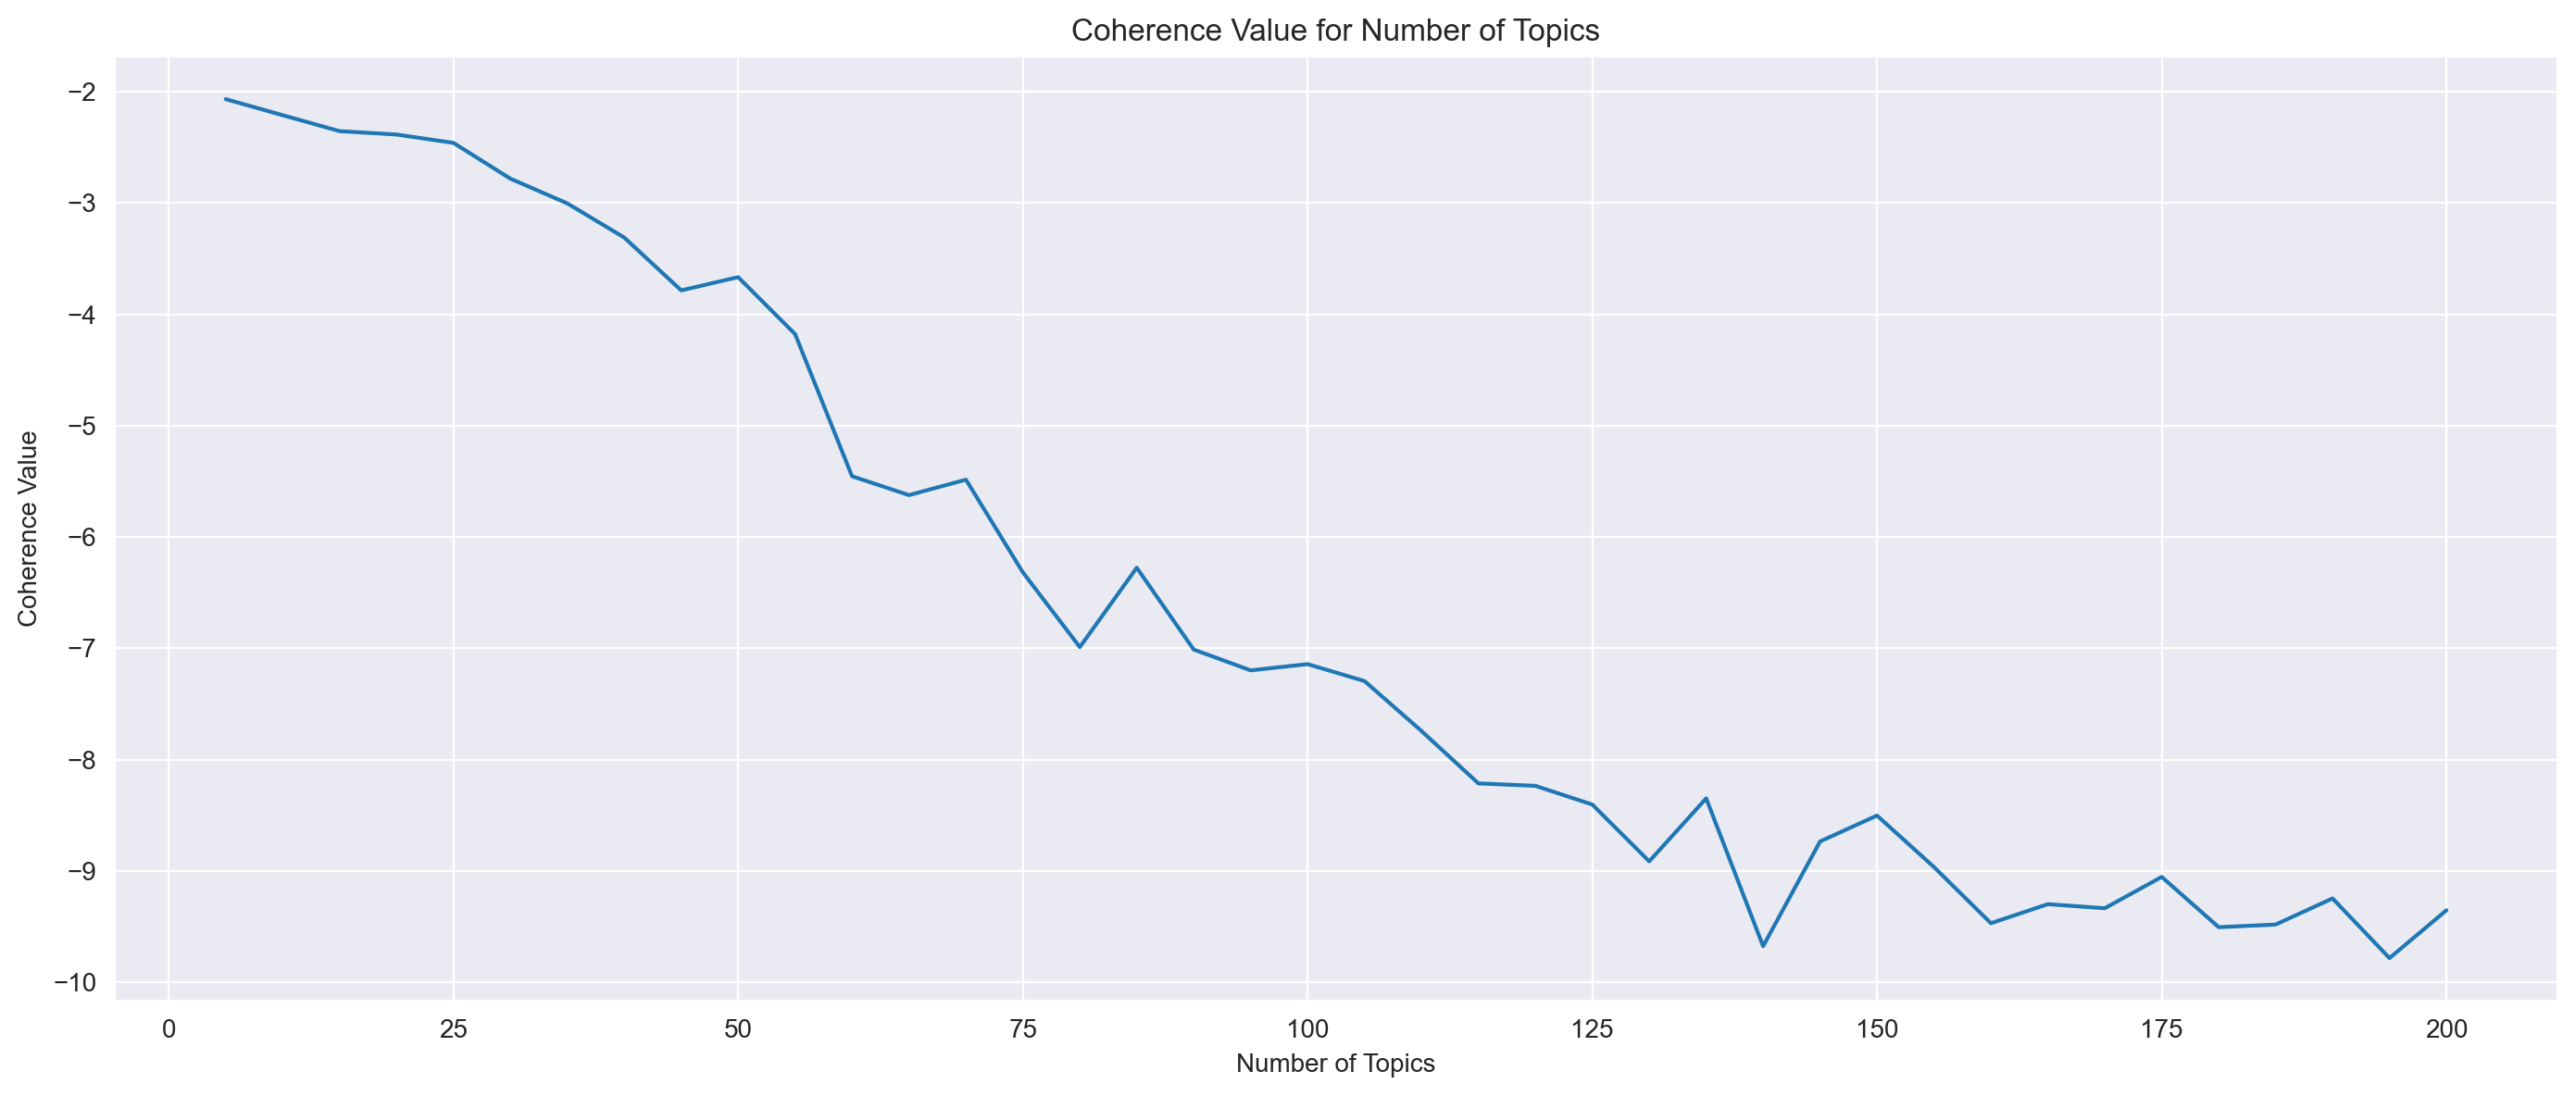

In [246]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(list(coherence_cum.iloc[:,0]),
         list(coherence_cum.iloc[:,1]))
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Coherence Value')
ax.set_title('Coherence Value for Number of Topics')

fig.tight_layout()

In [ ]:
%%time
# optimal number of topics is 140
num_topics = 140
chunksize = 1000
passes = 30
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda_model = LdaMulticore(corpus=doc_term_matrix,
                         num_topics=num_topics,
                         id2word=dict_,
                         iterations=iterations,
                         passes=passes,
                         eval_every=eval_every,
                         random_state=1999)

In [ ]:
lda_model.print_topics(num_words = 5, num_topics=140)

In [ ]:
%%time
df_topic = pd.DataFrame(np.zeros((len(df_wine), 140)))

for i, doc in enumerate(doc_term_matrix):
    topics = lda_model.get_document_topics(doc)
    for topic in topics:
        df_topic.iloc[i, topic[0]] = topic[1]

df_topic.head()

In [ ]:
# df_topic.to_csv('df_topic.csv')
# df_topic.head(10)

In [ ]:
df_wine = pd.concat([df_wine, df_topic], axis=1)
df_wine.head()

In [ ]:
# df_wine.to_csv('wine_clean.csv')

#### 3.4.5 Generate Year

In [ ]:
import re


def extract_year(title):
    year = re.findall(r'\d{4}', title)
    if len(year) == 0:
        return 'None'
    return re.findall(r'\d{4}', title)


def get_proper_year_in_list(year):
    if year == 'None':
        return 'None'
    else:
        year = list(map(int, year))
        result = max(year)
        if result > 2022:
            result = min(year)
        if result in [1872, 1821, 1887, 1607, 1919, 1868, 1904, 1847, 1882, 1827, 1503]:
            result = 'None'
        return str(result)

In [ ]:
df_wine['year'] = df_wine['title'].apply(extract_year)
df_wine['year'] = df_wine['year'].apply(get_proper_year_in_list)
df_wine.head()

In [ ]:
null_table(df_wine)

In [ ]:
df_wine['year'].value_counts().plot(kind='bar')

In [ ]:
type(df_wine['year'][0])